In [1]:
!pip install pandas
!pip install seaborn




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install scikit-learn


In [1]:
import warnings
warnings.filterwarnings('ignore')

# -- pandas and numpy --
import numpy as np
import pandas as pd

# -- plotting --
import matplotlib.pyplot as plt
import seaborn as sns

# -- sklearn stuff --

# -- sklearn modules
from sklearn.model_selection import train_test_split   #- partition train/test split
from sklearn.ensemble import RandomForestClassifier    #- random forest classifier
from sklearn.ensemble import GradientBoostingClassifier #- gradient boosting classifier
from sklearn.tree import DecisionTreeClassifier         #- decision tree classifier

# -- we need these to make our pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV # NOTE...
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# -- we need these to evaluate our models
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# -- need this to render charts in notebook --
%matplotlib inline

## Load Data

In [2]:
loan = pd.read_csv('car_loan.csv')
loan.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  ...  \
0               45                1441      1/1/1984        Salaried  ...   
1               45                1502      31-07-85   Self employed  ...   
2               45                1497      24-08-85   Self employed  ...   
3               45                1501      30-12-93   Self employed  ...   
4               45                1495     9/12/1977   Self employed  ...   

   SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  \
0                      0                     0                   0   
1                      0                     0                1991   
2                      0                     0                   0   
3                      0                     0                  31   
4                      0                     0                   0   

   SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES loan_default  
0              0yrs 0mon                0            0  
1             1yrs 11mon                0            1  
2              0yrs 0mon                0            0  
3              1yrs 3mon                1            1  
4              0yrs 0mon                1            1  

[5 rows x 40 columns]

# Preprocessing


## Clean up columns

In [3]:
loan.columns = ( loan.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('.', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '') # notice the backslash \ this is an escape character
)
print(loan.columns)

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'state_id', 'employee_code_id', 'mobileno_avl_flag',
       'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag',
       'passport_flag', 'perform_cns_score', 'perform_cns_score_description',
       'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts',
       'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
       'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts',
       'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount',
       'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'average_acct_age',
       'credit_history_length', 'no_of_inquiries', 'loan_default'],
      dtype='object')


In [4]:
# Get rid of IDs
# Identify columns containing '_id'
id_columns = [col for col in loan.columns if '_id' in col]
print(f"Columns containing '_id': {id_columns}")

# Create a list of columns to keep (excluding those with '_id')
columns_to_keep = [col for col in loan.columns if '_id' not in col]
print(f"Columns to keep: {columns_to_keep}")

# Create a new DataFrame with only the columns to keep
loan = loan[columns_to_keep]
loan.head()

Columns containing '_id': ['branch_id', 'supplier_id', 'manufacturer_id', 'current_pincode_id', 'state_id', 'employee_code_id']
Columns to keep: ['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'date_of_birth', 'employment_type', 'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns_score', 'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months', 'average_acct_age', 'credit_history_length', 'no_of_inquiries', 'loan_default']


uniqueid  disbursed_amount  asset_cost    ltv date_of_birth  \
0    420825             50578       58400  89.55      1/1/1984   
1    537409             47145       65550  73.23      31-07-85   
2    417566             53278       61360  89.63      24-08-85   
3    624493             57513       66113  88.48      30-12-93   
4    539055             52378       60300  88.39     9/12/1977   

  employment_type  mobileno_avl_flag  aadhar_flag  pan_flag  voterid_flag  \
0        Salaried                  1            1         0             0   
1   Self employed                  1            1         0             0   
2   Self employed                  1            1         0             0   
3   Self employed                  1            1         0             0   
4   Self employed                  1            1         0             0   

   ...  sec_sanctioned_amount  sec_disbursed_amount  primary_instal_amt  \
0  ...                      0                     0                   0   
1  ...                      0                     0                1991   
2  ...                      0                     0                   0   
3  ...                      0                     0                  31   
4  ...                      0                     0                   0   

  sec_instal_amt  new_accts_in_last_six_months  \
0              0                             0   
1              0                             0   
2              0                             0   
3              0                             0   
4              0                             0   

   delinquent_accts_in_last_six_months  average_acct_age  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   

   credit_history_length  no_of_inquiries  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  
2              0yrs 0mon                0             0  
3              1yrs 3mon                1             1  
4              0yrs 0mon                1             1  

[5 rows x 34 columns]

## Clean up Data

for example:

- average_acct_age
- credit_history_length
- date_of_birth



In [5]:
loan['avg_acct_age'] = loan['average_acct_age'].str.extract(r'(\d+)').astype(float) + loan['average_acct_age'].str.extract(r'(\d+)m').fillna(0).astype(float) / 12
loan['avg_acct_age'].describe()


count    233154.000000
mean          0.742980
std           1.258868
min           0.000000
25%           0.000000
50%           0.000000
75%           1.083333
max          30.750000
Name: avg_acct_age, dtype: float64

In [6]:
loan['credit_hist_leng'] = loan['credit_history_length'].str.extract(r'(\d+)').astype(float) + loan['credit_history_length'].str.extract(r'(\d+)m').fillna(0).astype(float) / 12
# loan['credit_hist_leng'].describe()
loan['credit_hist_leng'].head()


0    0.000000
1    1.916667
2    0.000000
3    1.250000
4    0.000000
Name: credit_hist_leng, dtype: float64

In [7]:
# Function to convert date strings based on format
def convert_dates(date_series):
    # Convert dates assuming format DD/MM/YYYY
    converted_dates_1 = pd.to_datetime(date_series, format='%d/%m/%Y', errors='coerce')

    # Convert dates assuming format DD-MM-YY (European style)
    converted_dates_2 = pd.to_datetime(date_series, format='%d-%m-%y', errors='coerce')

    # Combine both conversions, filling NaTs from the first with values from the second
    final_dates = converted_dates_1.fillna(converted_dates_2)

    return final_dates


# Apply the function to the 'date_of_birth' column
loan['date_of_birth'] = convert_dates(loan['date_of_birth'])


loan['birth_year'] = loan['date_of_birth'].dt.year

# Display the updated DataFrame
loan.head()

uniqueid  disbursed_amount  asset_cost    ltv date_of_birth  \
0    420825             50578       58400  89.55    1984-01-01   
1    537409             47145       65550  73.23    1985-07-31   
2    417566             53278       61360  89.63    1985-08-24   
3    624493             57513       66113  88.48    1993-12-30   
4    539055             52378       60300  88.39    1977-12-09   

  employment_type  mobileno_avl_flag  aadhar_flag  pan_flag  voterid_flag  \
0        Salaried                  1            1         0             0   
1   Self employed                  1            1         0             0   
2   Self employed                  1            1         0             0   
3   Self employed                  1            1         0             0   
4   Self employed                  1            1         0             0   

   ...  sec_instal_amt  new_accts_in_last_six_months  \
0  ...               0                             0   
1  ...               0                             0   
2  ...               0                             0   
3  ...               0                             0   
4  ...               0                             0   

   delinquent_accts_in_last_six_months average_acct_age  \
0                                    0        0yrs 0mon   
1                                    1       1yrs 11mon   
2                                    0        0yrs 0mon   
3                                    0        0yrs 8mon   
4                                    0        0yrs 0mon   

   credit_history_length  no_of_inquiries  loan_default  avg_acct_age  \
0              0yrs 0mon                0             0      0.000000   
1             1yrs 11mon                0             1      1.916667   
2              0yrs 0mon                0             0      0.000000   
3              1yrs 3mon                1             1      0.666667   
4              0yrs 0mon                1             1      0.000000   

   credit_hist_leng  birth_year  
0          0.000000        1984  
1          1.916667        1985  
2          0.000000        1985  
3          1.250000        1993  
4          0.000000        1977  

[5 rows x 37 columns]

In [8]:
loan['customer_age'] = 2024 - loan['birth_year']
# deal with age < 0
loan['customer_age'] = np.where(loan['customer_age'] < 0, loan['customer_age'].median(), loan['customer_age'])
loan['customer_age'].describe()

count    233154.00000
mean         39.53134
std           9.23584
min          24.00000
25%          32.00000
50%          38.00000
75%          46.00000
max          70.00000
Name: customer_age, dtype: float64

## Are their Nulls?

In [9]:
len(loan.columns)

38

In [10]:
loan.isna().sum()

uniqueid                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
date_of_birth                             0
employment_type                        7661
mobileno_avl_flag                         0
aadhar_flag                               0
pan_flag                                  0
voterid_flag                              0
driving_flag                              0
passport_flag                             0
perform_cns_score                         0
perform_cns_score_description             0
pri_no_of_accts                           0
pri_active_accts                          0
pri_overdue_accts                         0
pri_current_balance                       0
pri_sanctioned_amount                     0
pri_disbursed_amount                      0
sec_no_of_accts                           0
sec_active_accts                          0
sec_overdue_accts               

In [11]:
loan['employment_type'].fillna('Unknown', inplace=True)
loan['employment_type'].value_counts()

employment_type
Self employed    127635
Salaried          97858
Unknown            7661
Name: count, dtype: int64

In [12]:
loan.drop(columns=['average_acct_age', 'credit_history_length', 'date_of_birth'], inplace=True)


# Is data skewed

Skewness of important features:
 disbursed_amount           4.492240
asset_cost                 6.133485
ltv                       -1.075766
pri_current_balance       29.425813
pri_sanctioned_amount    323.697212
pri_disbursed_amount     322.541495
sec_current_balance      108.506295
sec_sanctioned_amount     75.254932
sec_disbursed_amount      75.764252
primary_instal_amt        69.916156
sec_instal_amt           153.806369
pri_no_of_accts            9.744845
pri_active_accts           5.371850
pri_overdue_accts          7.512927
sec_no_of_accts           27.986090
sec_active_accts          30.599510
sec_overdue_accts         24.129271
no_of_inquiries            7.870683
perform_cns_score          0.445150
customer_age               0.628932
dtype: float64


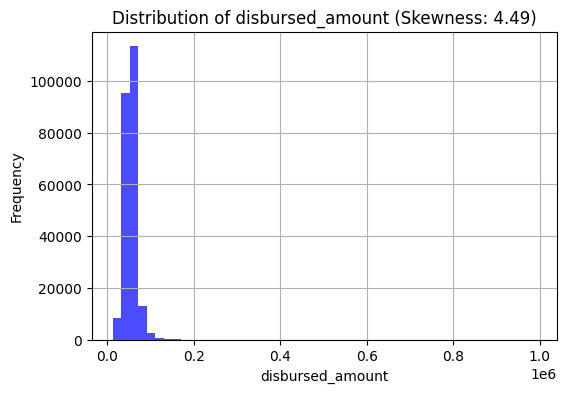

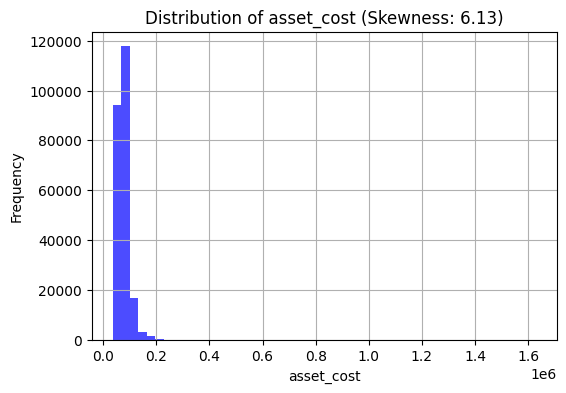

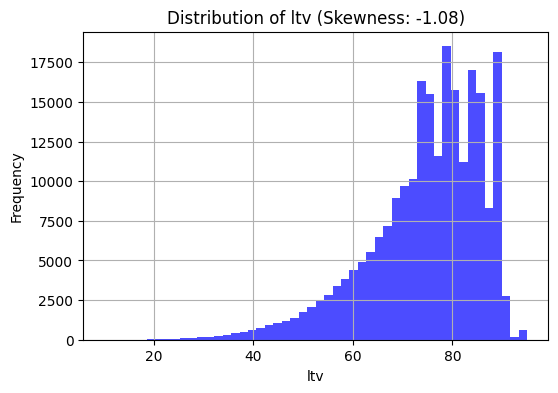

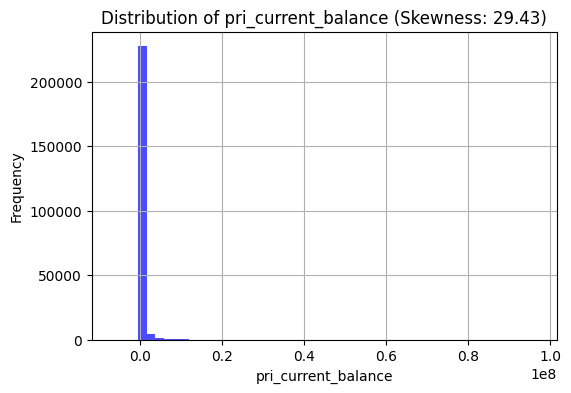

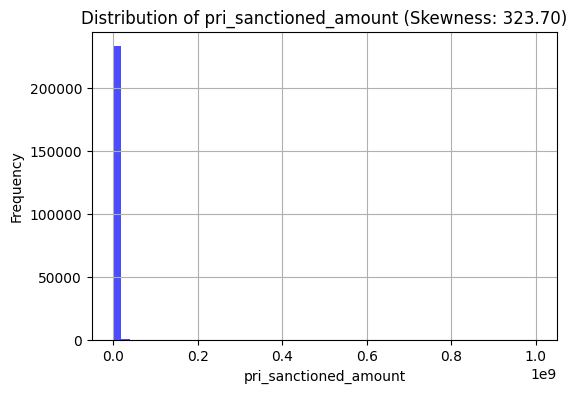

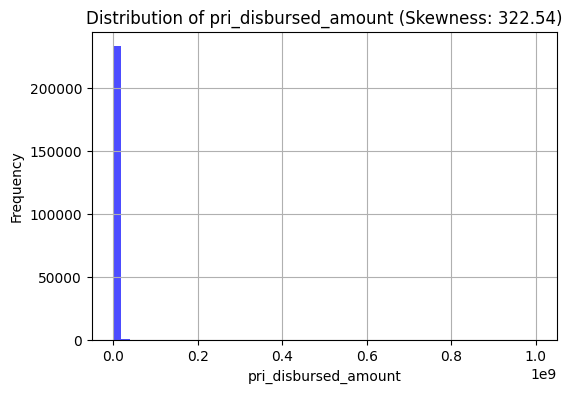

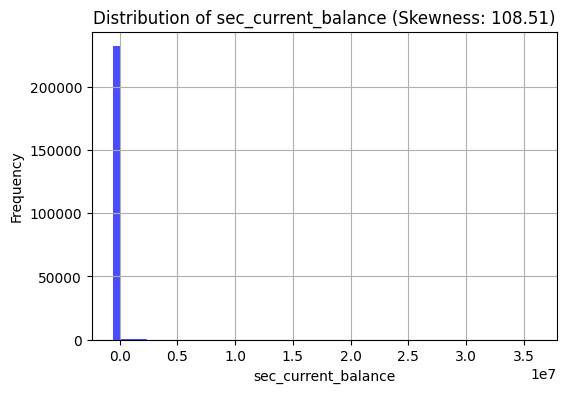

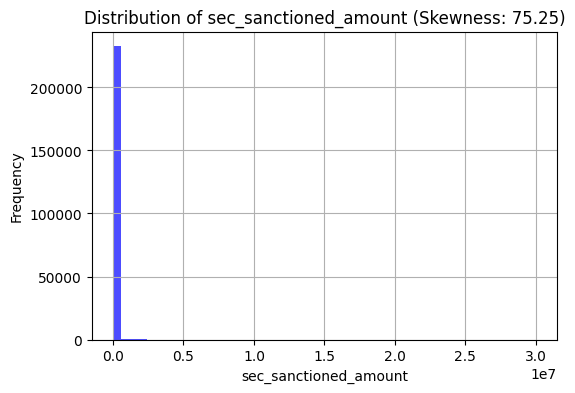

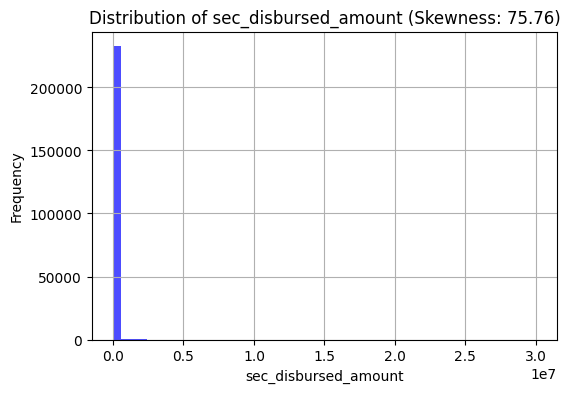

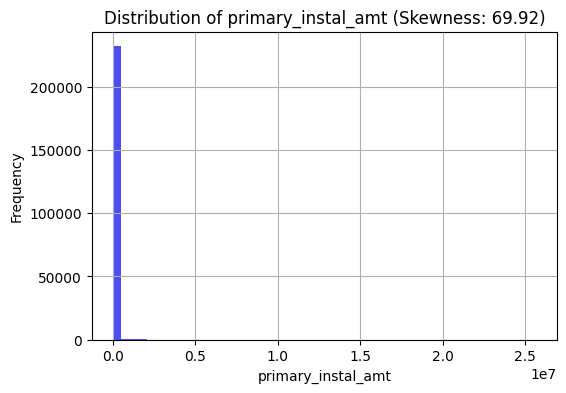

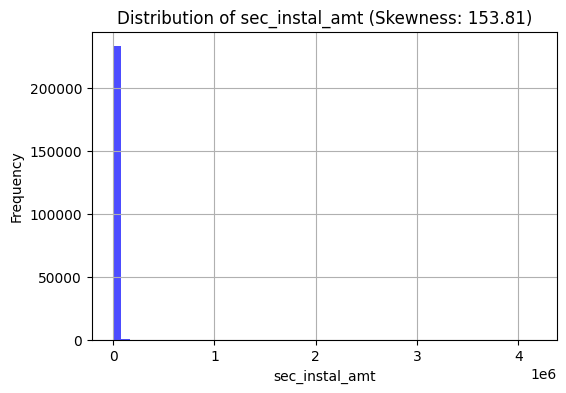

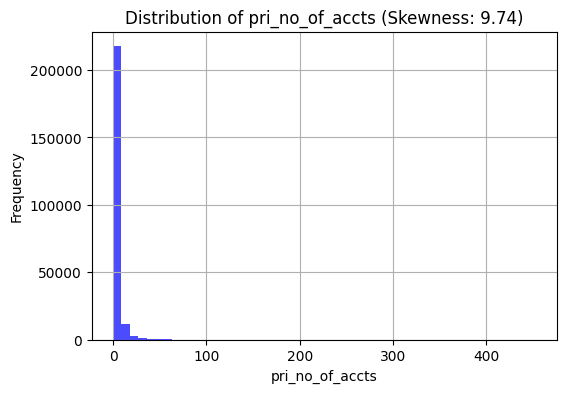

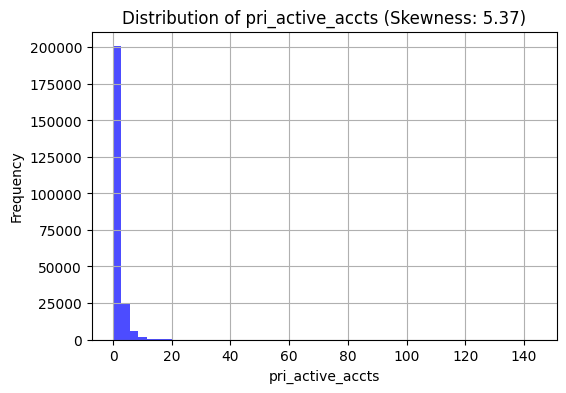

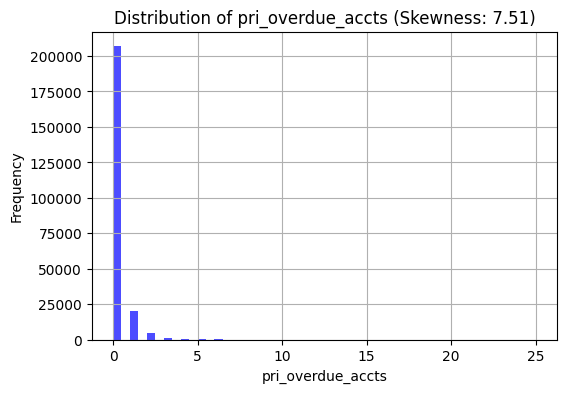

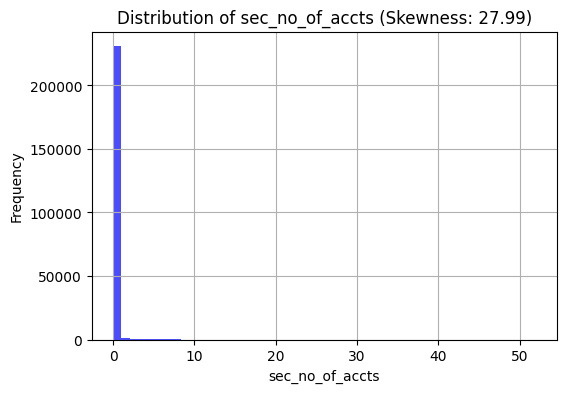

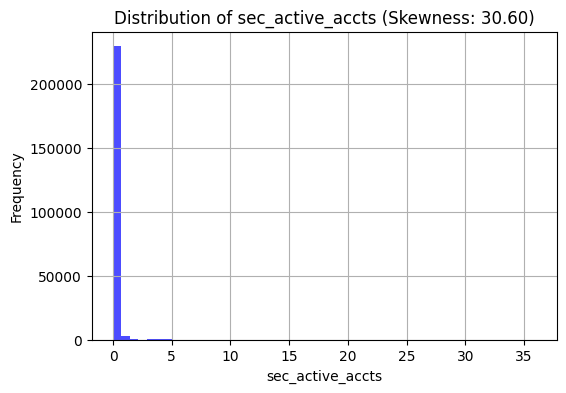

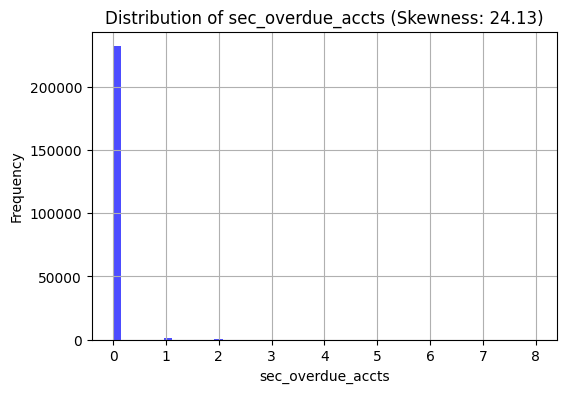

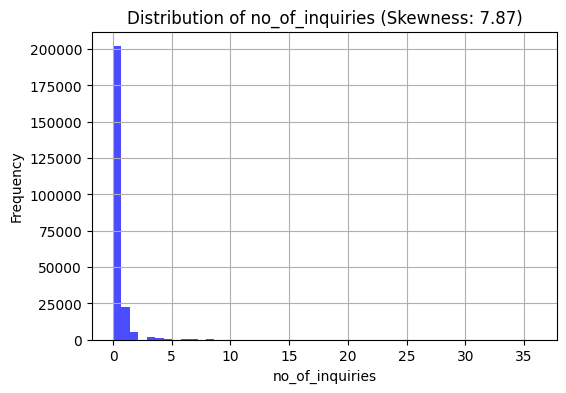

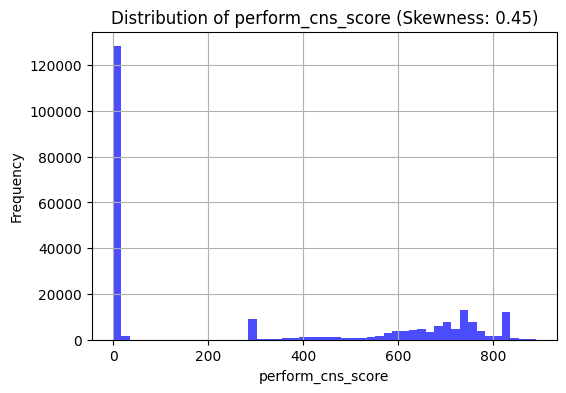

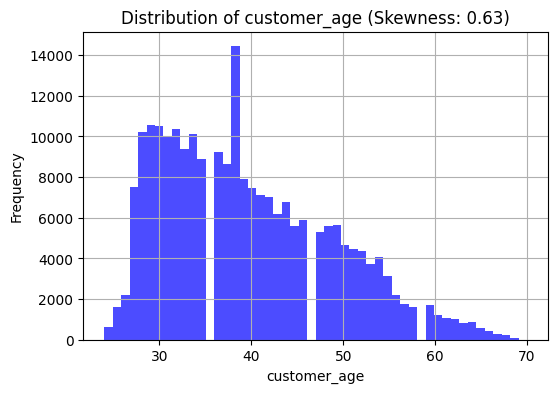

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of important features to check skewness
important_features = [
    'disbursed_amount', 'asset_cost', 'ltv', 
    'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount', 
    'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount', 
    'primary_instal_amt', 'sec_instal_amt', 
    'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts', 
    'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 
    'no_of_inquiries', 'perform_cns_score', 'customer_age'
]

# Calculate skewness for each important feature
skewness = loan[important_features].skew()

# Print skewness values
print("Skewness of important features:\n", skewness)

# Optionally, you can plot histograms for each feature to visualize skewness
for feature in important_features:
    plt.figure(figsize=(6, 4))
    plt.hist(loan[feature].dropna(), bins=50, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature} (Skewness: {skewness[feature]:.2f})')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


## Handling skewness in  data

disbursed_amount         -0.454610
asset_cost                1.279172
pri_current_balance            NaN
pri_sanctioned_amount     0.481521
pri_disbursed_amount      0.487272
sec_current_balance            NaN
sec_sanctioned_amount     7.989916
sec_disbursed_amount      8.052277
primary_instal_amt        0.940679
sec_instal_amt           10.682287
pri_no_of_accts           1.033983
pri_active_accts          1.165160
pri_overdue_accts         3.166314
sec_no_of_accts           8.779581
sec_active_accts         10.303634
sec_overdue_accts        15.454116
no_of_inquiries           3.007293
dtype: float64


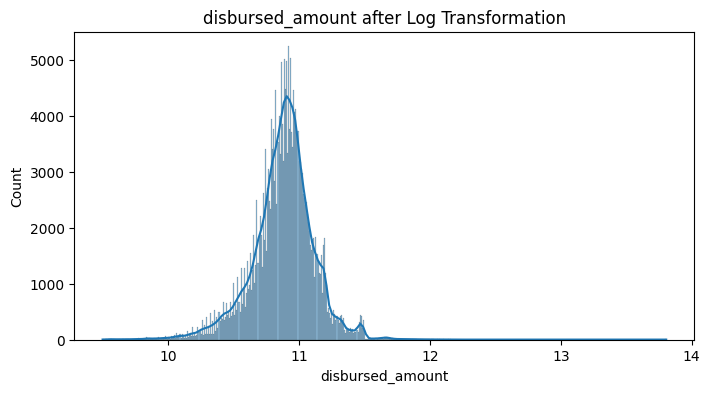

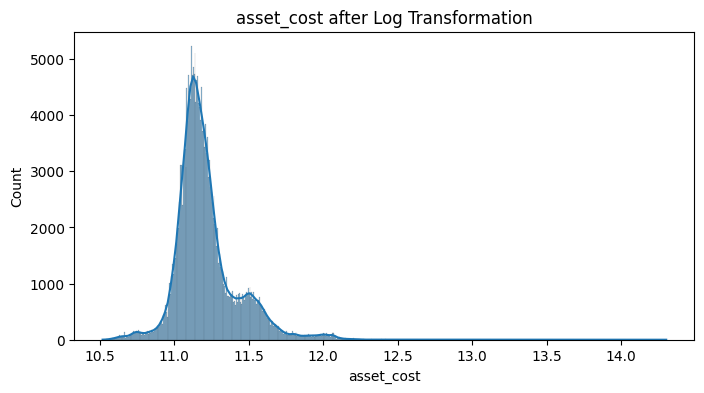

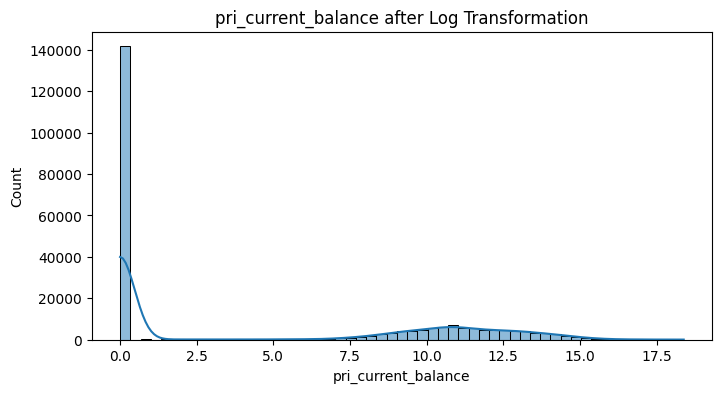

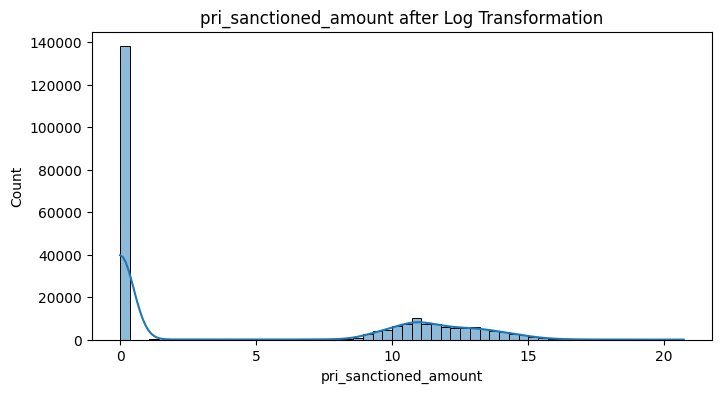

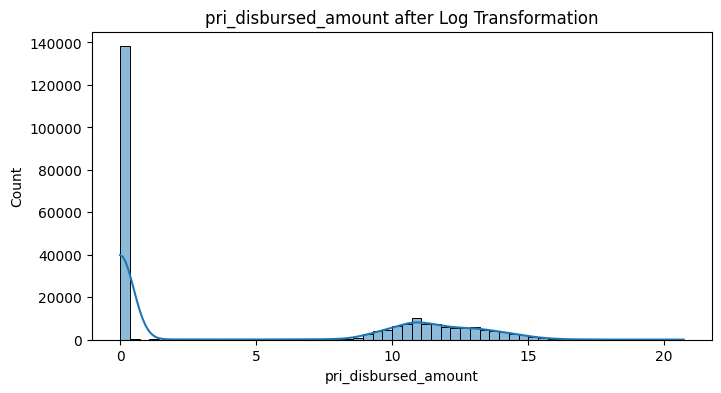

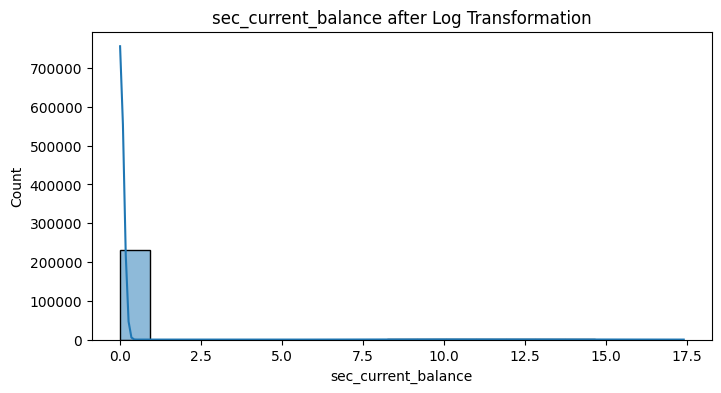

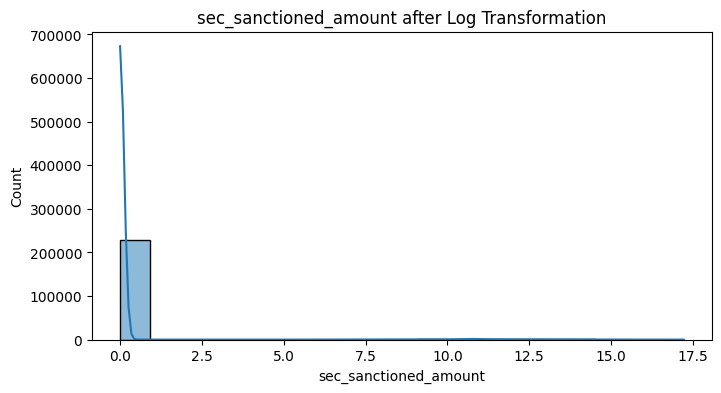

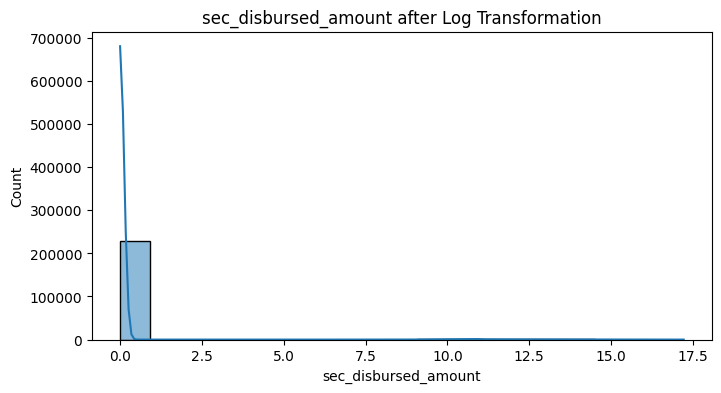

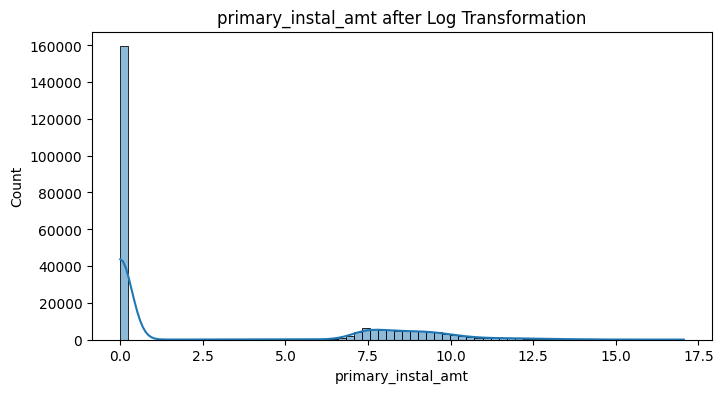

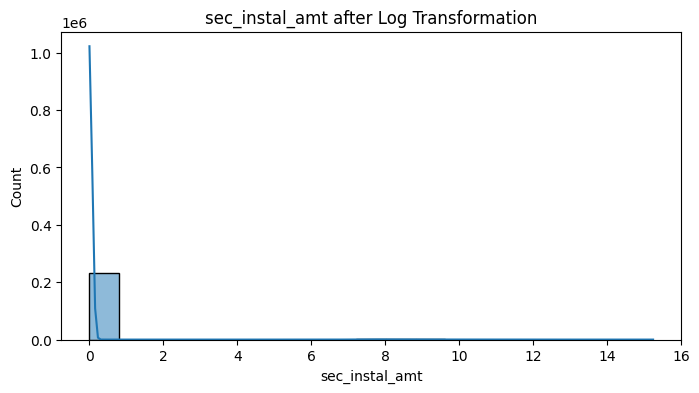

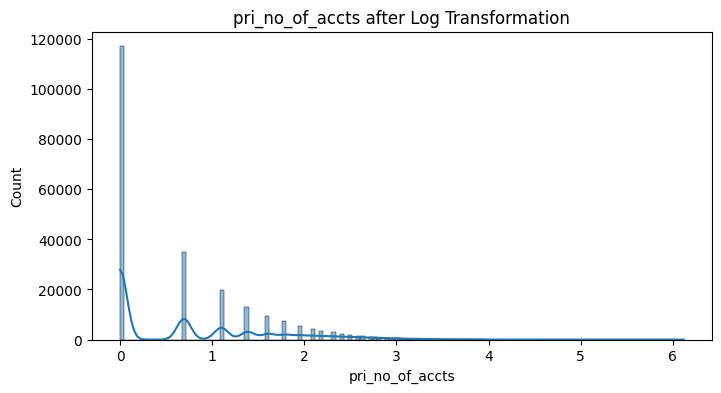

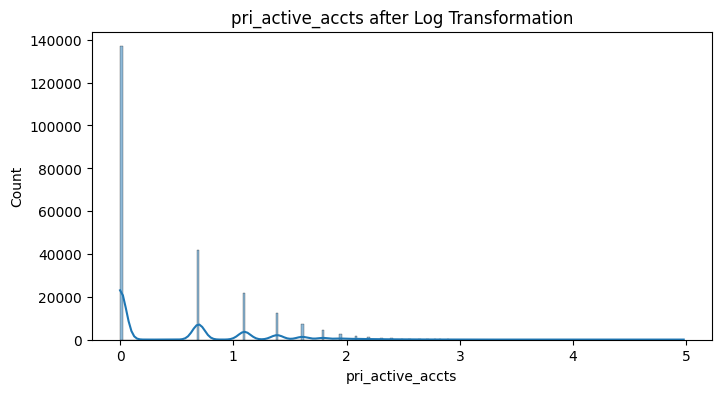

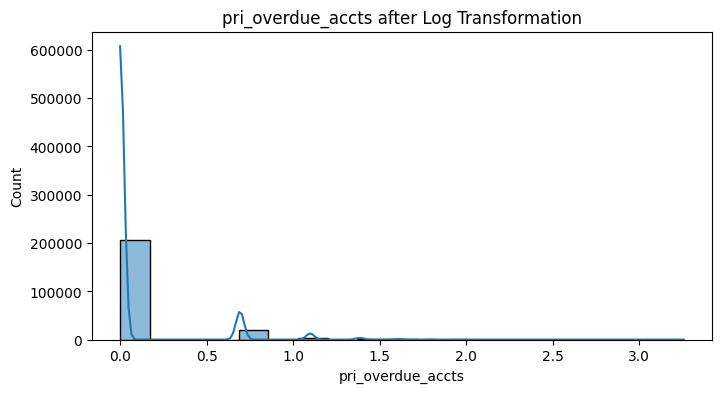

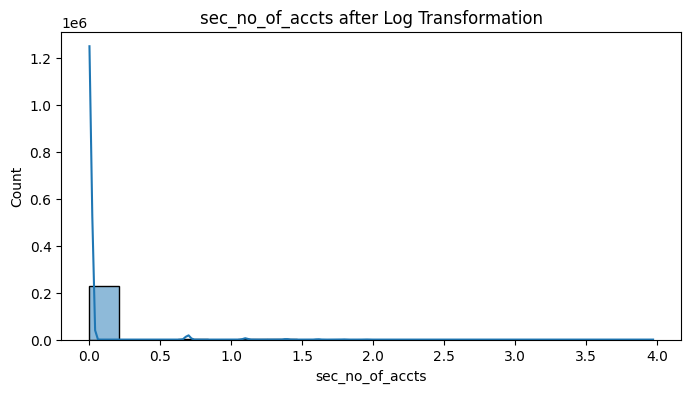

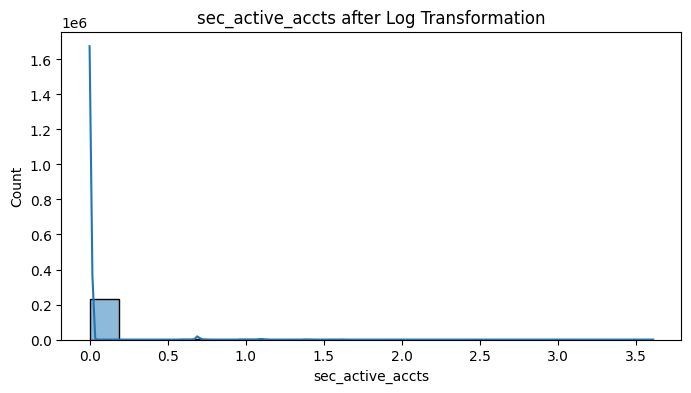

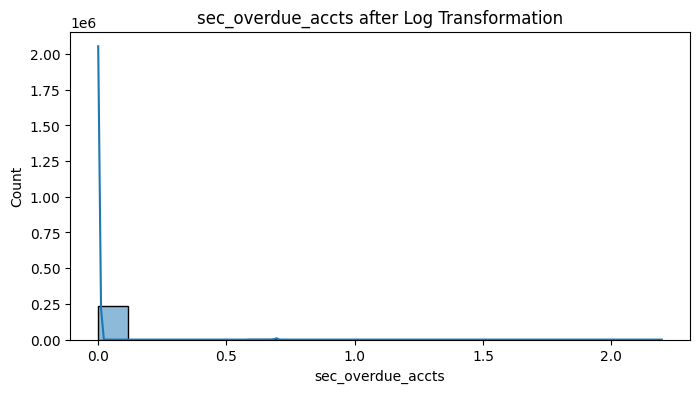

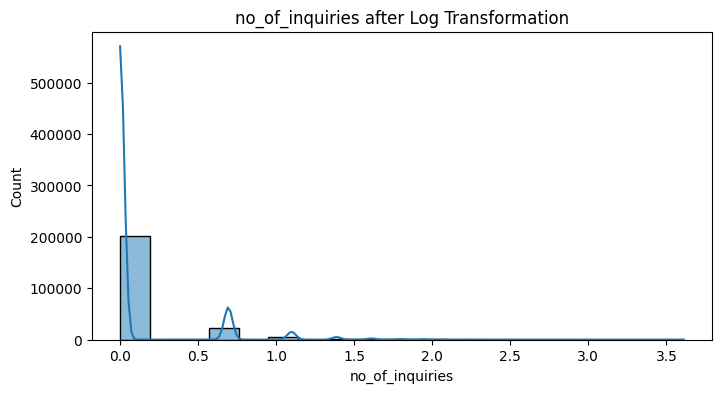

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and you already have the skewness calculated
skewed_features = ['disbursed_amount', 'asset_cost', 'pri_current_balance', 
                   'pri_sanctioned_amount', 'pri_disbursed_amount', 
                   'sec_current_balance', 'sec_sanctioned_amount', 
                   'sec_disbursed_amount', 'primary_instal_amt', 
                   'sec_instal_amt', 'pri_no_of_accts', 'pri_active_accts', 
                   'pri_overdue_accts', 'sec_no_of_accts', 'sec_active_accts', 
                   'sec_overdue_accts', 'no_of_inquiries']

# Apply log transformation to reduce positive skewness
for feature in skewed_features:
    # Since some values might be zero, we add 1 to avoid log(0)
    loan[feature] = np.log1p(loan[feature])

# Verify the effect of transformation
skewness_after_transformation = loan[skewed_features].apply(lambda x: x.skew())
print(skewness_after_transformation)

# Plot histograms to visualize the effect of transformation
for feature in skewed_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(loan[feature], kde=True)
    plt.title(f'{feature} after Log Transformation')
    plt.show()


In [11]:
loan.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'date_of_birth',
       'employment_type', 'mobileno_avl_flag', 'aadhar_flag', 'pan_flag',
       'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default', 'avg_acct_age', 'credit_hist_leng', 'birth_year',
       'customer_age'],
      dtype='object')

**Adding aditional columns by combination of existing ones**

In [14]:
loan['id_verification_score'] = loan['mobileno_avl_flag'] + loan['aadhar_flag'] + loan['pan_flag'] + loan['voterid_flag'] + loan['driving_flag'] + loan['passport_flag']

In [15]:
loan['loan_burden_ratio'] = (loan['primary_instal_amt'] + loan['sec_instal_amt'] )/loan['asset_cost']

In [16]:
loan['new_credit_behavior'] = loan['new_accts_in_last_six_months'] + loan['no_of_inquiries']

In [17]:
loan['credit_stability'] = loan['credit_hist_leng'] + loan['avg_acct_age']

## Exploratory Data Analysis

In [16]:
loan['loan_default'].value_counts()

loan_default
0    182543
1     50611
Name: count, dtype: int64

<Axes: xlabel='loan_default'>

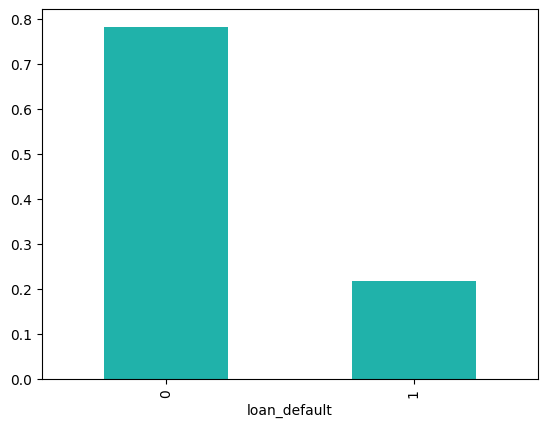

In [ ]:
loan['loan_default'].value_counts(normalize=True).plot(kind='bar',color='lightseagreen')


In [ ]:
loan['loan_default'].value_counts(normalize=True)

loan_default
0    0.782929
1    0.217071
Name: proportion, dtype: float64

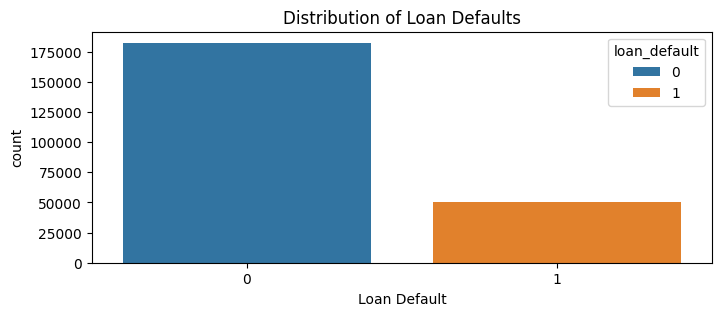

In [ ]:
plt.figure(figsize=(8, 3))
sns.countplot(data=loan, x='loan_default', hue='loan_default')
plt.xlabel('Loan Default')
plt.title('Distribution of Loan Defaults')
plt.show()

In [17]:
loan.groupby('loan_default').describe().T

loan_default                        0              1
uniqueid         count       182543.0        50611.0
                 mean   534700.011186  540309.058525
                 min         417428.0       417439.0
                 25%         476510.0       477773.0
                 50%         533986.0       544405.0
...                               ...            ...
credit_stability 25%              0.0            0.0
                 50%              0.0            0.0
                 75%         3.166667       2.833333
                 max             61.5      46.333333
                 std         3.570845        3.21679

[296 rows x 2 columns]

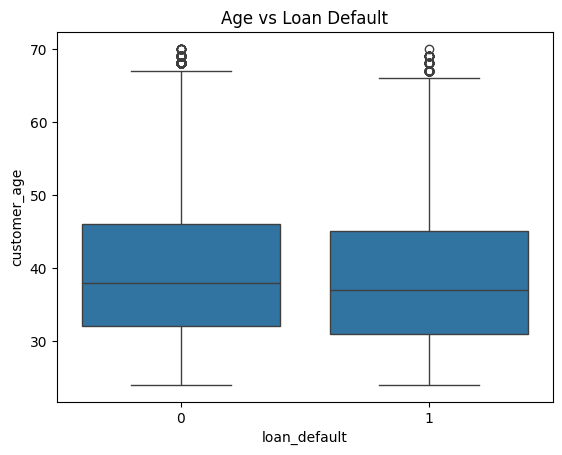

In [68]:
sns.boxplot(x='loan_default', y='customer_age', data=loan)
plt.title('Age vs Loan Default')
plt.show()

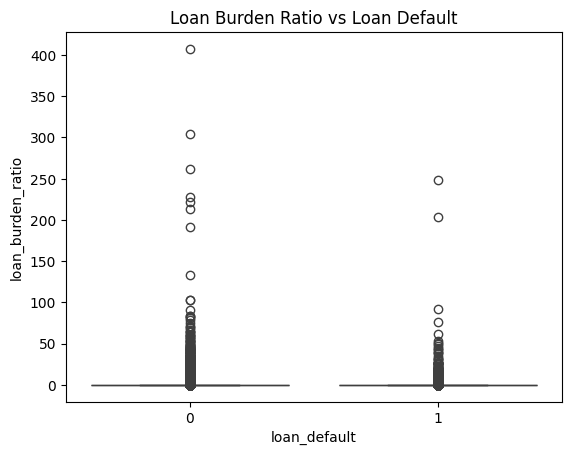

In [33]:
sns.boxplot(x='loan_default', y='loan_burden_ratio', data=loan)
plt.title('Loan Burden Ratio vs Loan Default')
plt.show()


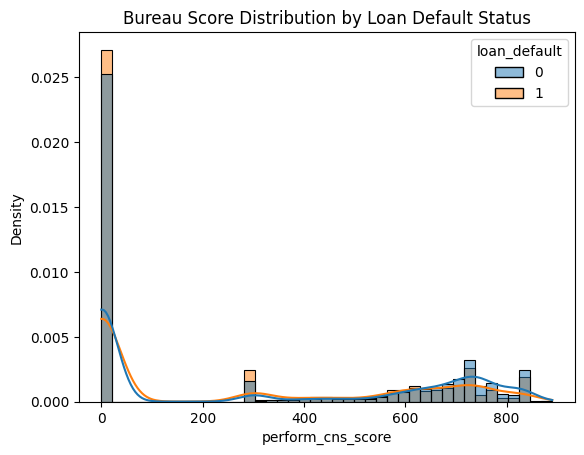

In [34]:
sns.histplot(data=loan, x='perform_cns_score', hue='loan_default', kde=True, stat="density", common_norm=False)
plt.title('Bureau Score Distribution by Loan Default Status')
plt.show()


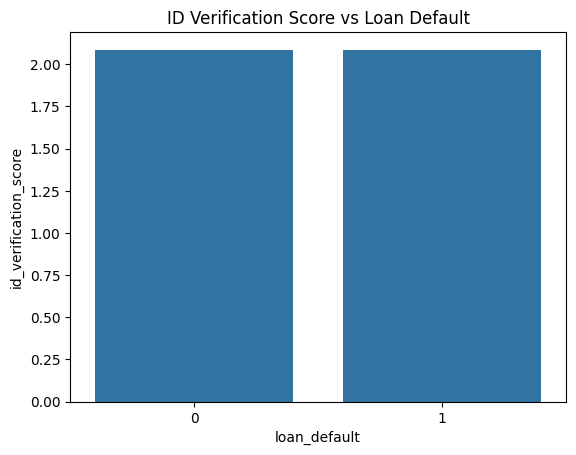

In [35]:
sns.barplot(x='loan_default', y='id_verification_score', data=loan, ci=None)
plt.title('ID Verification Score vs Loan Default')
plt.show()


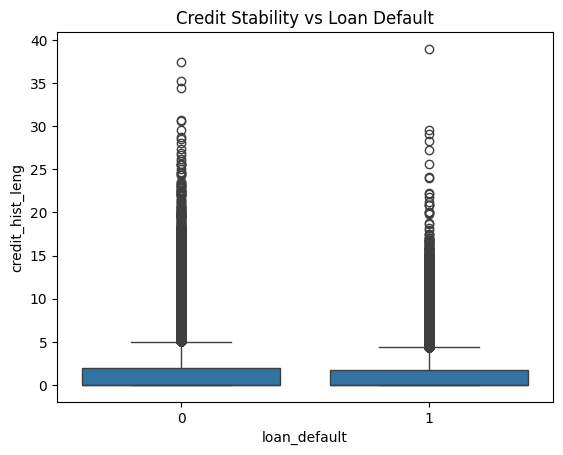

In [31]:
sns.boxplot(x='loan_default', y='credit_hist_leng', data=loan)
plt.title('Credit Stability vs Loan Default')
plt.show()


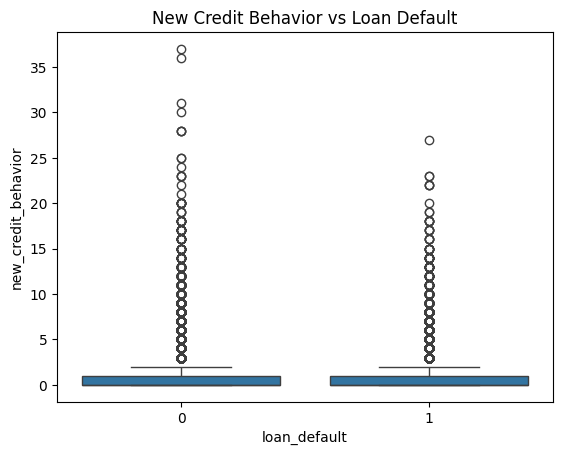

In [37]:
sns.boxplot(x='loan_default', y='new_credit_behavior', data=loan)
plt.title('New Credit Behavior vs Loan Default')
plt.show()

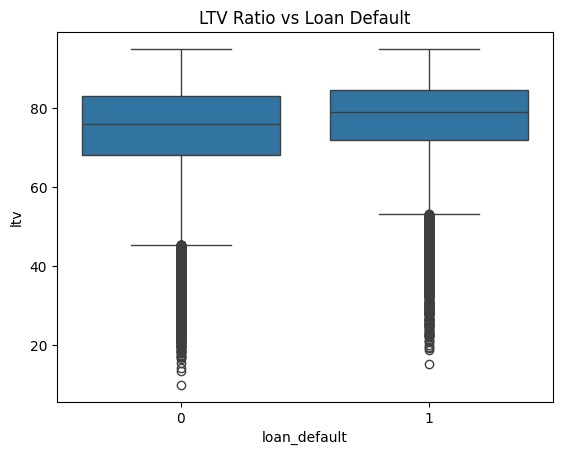

In [38]:
sns.boxplot(x='loan_default', y='ltv', data=loan)
plt.title('LTV Ratio vs Loan Default')
plt.show()


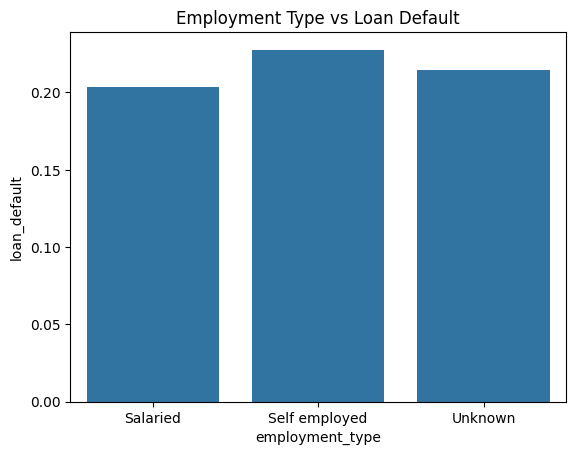

In [18]:
sns.barplot(x='employment_type', y='loan_default', data=loan, ci=None)
plt.title('Employment Type vs Loan Default')
plt.show()


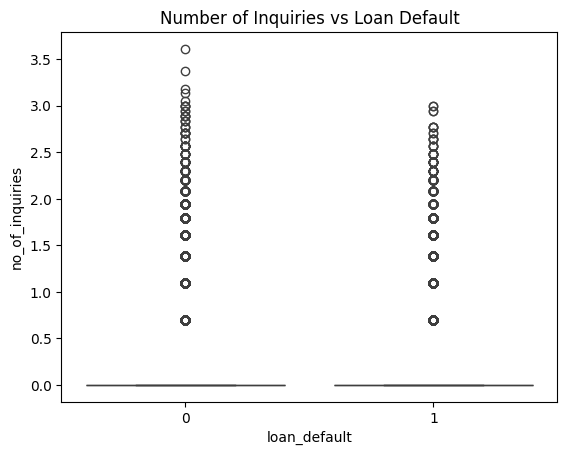

In [39]:
sns.boxplot(x='loan_default', y='no_of_inquiries', data=loan)
plt.title('Number of Inquiries vs Loan Default')
plt.show() 

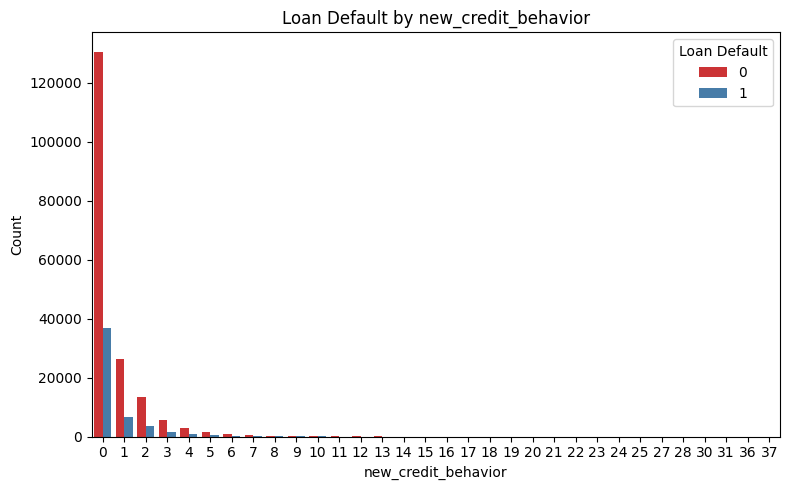

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=loan, x='new_credit_behavior', hue='loan_default', palette='Set1')
plt.title('Loan Default by new_credit_behavior')
plt.xlabel('new_credit_behavior')
plt.ylabel('Count')
plt.legend(title='Loan Default')
plt.tight_layout()
plt.show()

Number of unique values in 'customer_age': 47
Number of bins: 30


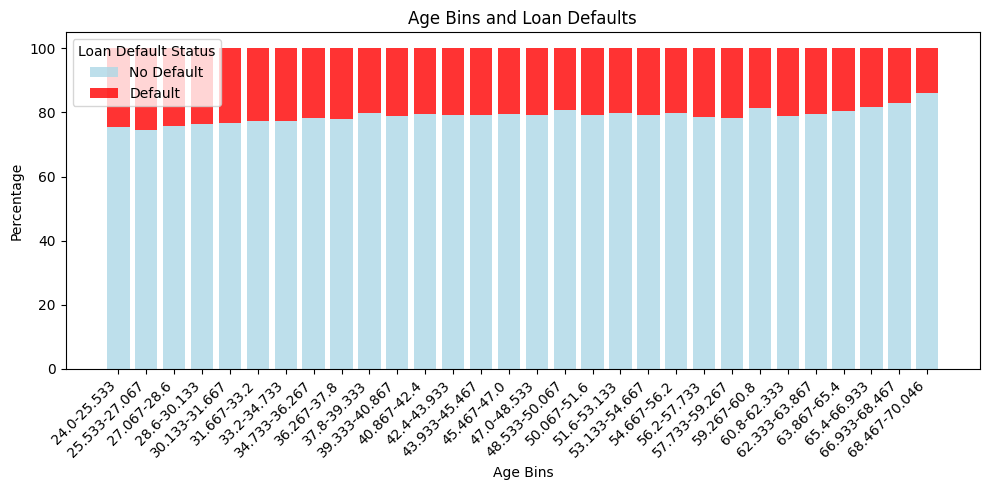

In [ ]:
# Calculate the number of unique values
num_unique_values = loan['customer_age'].nunique()
print(f"Number of unique values in 'customer_age': {num_unique_values}")

# Decide on the number of bins
num_bins = min(num_unique_values, 30)
print(f"Number of bins: {num_bins}")

# Create bins using pd.cut for non-NaN values to determine bin edges
bins = pd.cut(loan['customer_age'].dropna(), bins=num_bins, right=False, duplicates='drop')

# Get the bin edges from the resulting pd.IntervalIndex
bin_edges = bins.cat.categories

# Create a new column with binned ages using the bin edges
loan['age_bins'] = pd.cut(loan['customer_age'], bins=bin_edges, right=False, include_lowest=True)

# Ensure the age_bins column is categorical
loan['age_bins'] = loan['age_bins'].astype('category')

# Calculate the percentage distribution of loan defaults in each age bin
crosstab_result = pd.crosstab(loan['age_bins'], loan['loan_default'], normalize='index') * 100

# Convert interval index to string labels for plotting
crosstab_result.index = crosstab_result.index.map(lambda x: f'{x.left}-{x.right}')

# Plot the stacked bar chart
plt.figure(figsize=(10, 5))
plt.bar(crosstab_result.index, crosstab_result[0], label='No Default', color='lightblue', alpha=0.8)
plt.bar(crosstab_result.index, crosstab_result[1], bottom=crosstab_result[0], label='Default', color='red', alpha=0.8)
plt.title('Age Bins and Loan Defaults')
plt.xlabel('Age Bins')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Default Status')
plt.tight_layout()
plt.show()

loan.drop(columns=['age_bins'], inplace=True)


Number of unique values in avg_acct_age: 192
Number of bins: 30


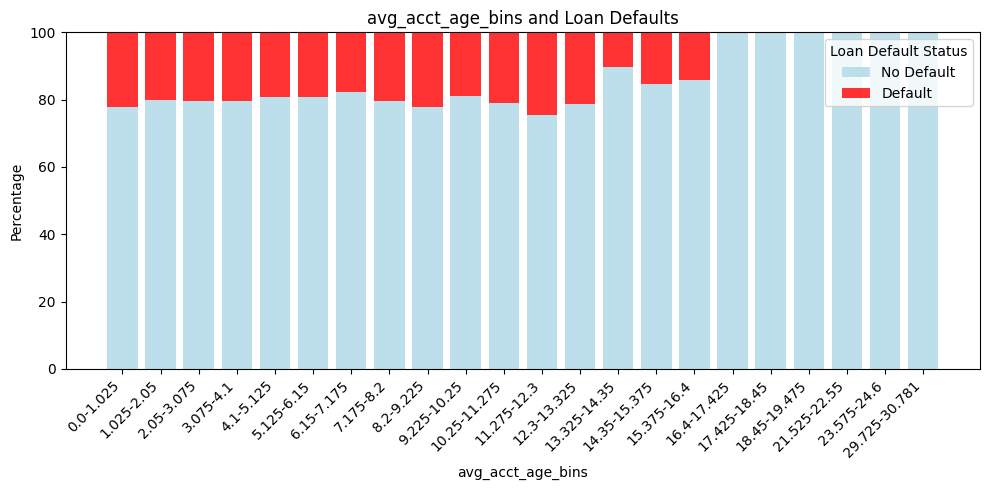

In [ ]:
def profile_numeric(col):
  # Calculate the number of unique values
  num_unique_values = loan[col].nunique()
  print(f"Number of unique values in {col}: {num_unique_values}")

  # Decide on the number of bins
  num_bins = min(num_unique_values, 30)
  print(f"Number of bins: {num_bins}")

  # Create bins using pd.cut for non-NaN values to determine bin edges
  bins = pd.cut(loan[col].dropna(), bins=num_bins, right=False, duplicates='drop')

  # Get the bin edges from the resulting pd.IntervalIndex
  bin_edges = bins.cat.categories

  # Create a new column with binned ages using the bin edges
  loan[f'{col}_bins'] = pd.cut(loan[col], bins=bin_edges, right=False, include_lowest=True)

  # Ensure the age_bins column is categorical
  loan[f'{col}_bins'] = loan[f'{col}_bins'].astype('category')

  # Calculate the percentage distribution of loan defaults in each age bin
  crosstab_result = pd.crosstab(loan[f'{col}_bins'], loan['loan_default'], normalize='index') * 100

  # Convert interval index to string labels for plotting
  crosstab_result.index = crosstab_result.index.map(lambda x: f'{x.left}-{x.right}')

  # Plot the stacked bar chart
  plt.figure(figsize=(10, 5))
  plt.bar(crosstab_result.index, crosstab_result[0], label='No Default', color='lightblue', alpha=0.8)
  plt.bar(crosstab_result.index, crosstab_result[1], bottom=crosstab_result[0], label='Default', color='red', alpha=0.8)
  plt.title(f'{col}_bins and Loan Defaults')
  plt.xlabel(f'{col}_bins')
  plt.ylabel('Percentage')
  plt.xticks(rotation=45, ha='right')
  plt.legend(title='Loan Default Status')
  plt.tight_layout()
  plt.show()
  loan.drop(columns=[f'{col}_bins'], inplace=True)

profile_numeric('avg_acct_age')

Number of unique values in uniqueid: 233154
Number of bins: 30


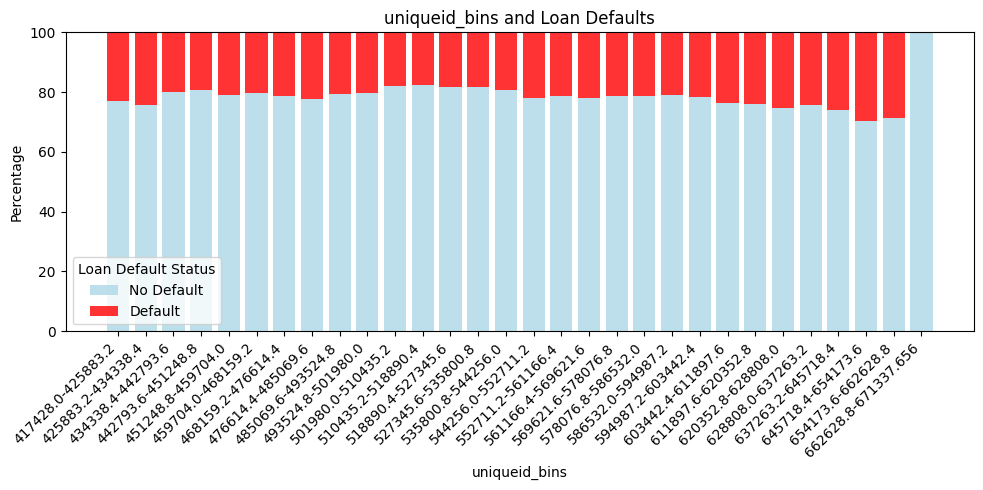

Number of unique values in disbursed_amount: 24565
Number of bins: 30


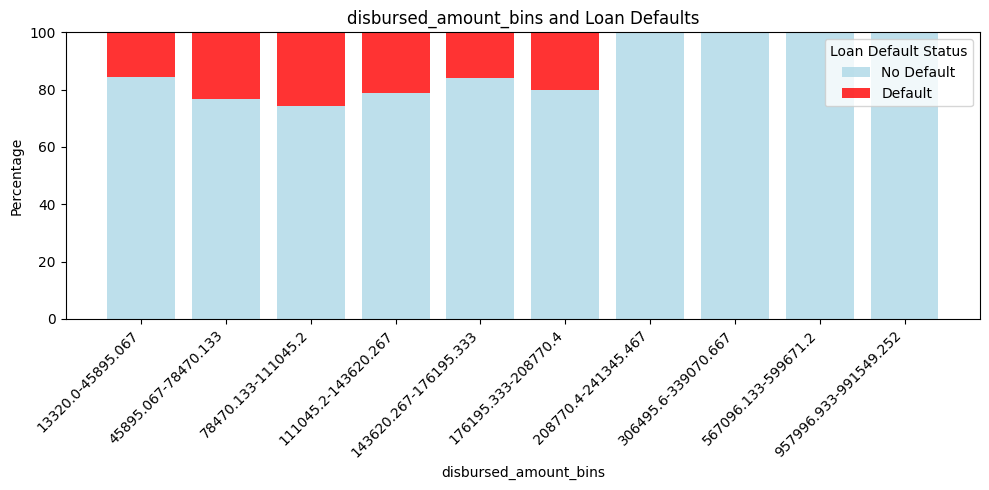

Number of unique values in asset_cost: 46252
Number of bins: 30


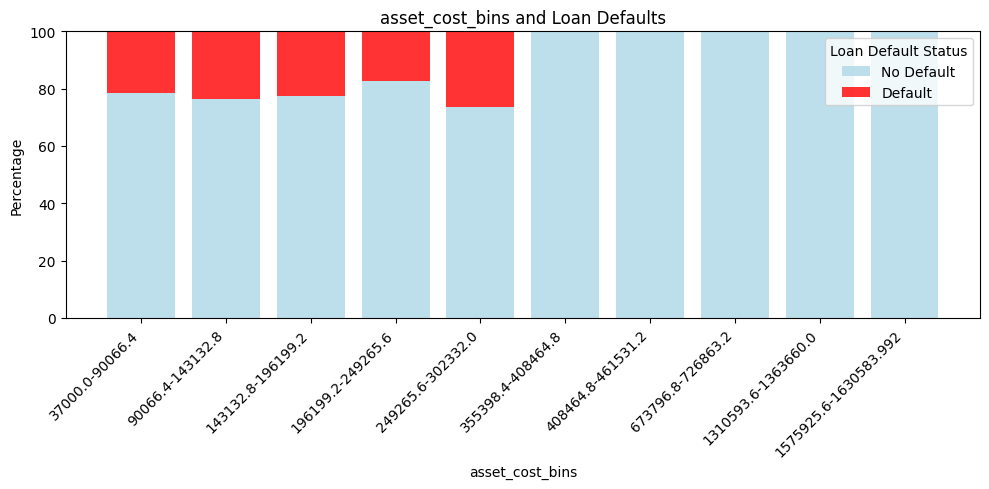

Number of unique values in ltv: 6579
Number of bins: 30


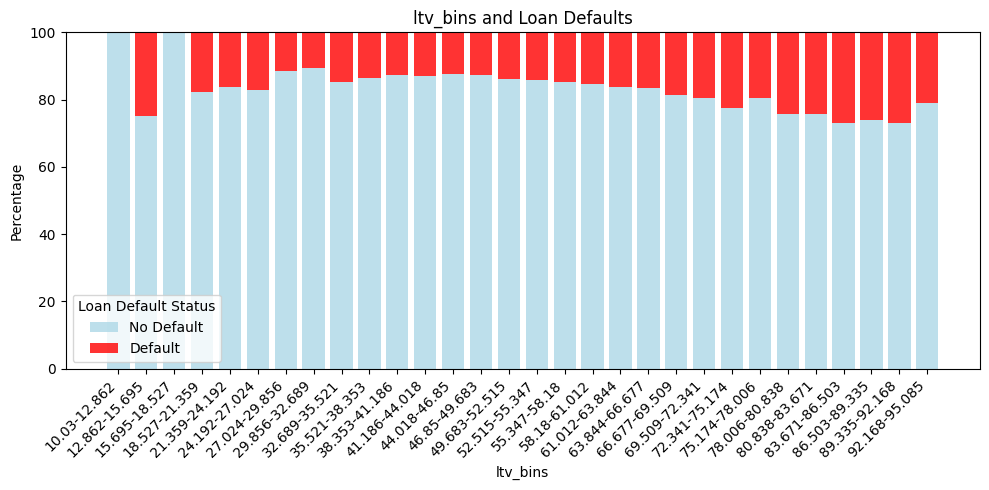

Number of unique values in mobileno_avl_flag: 1
Number of bins: 1


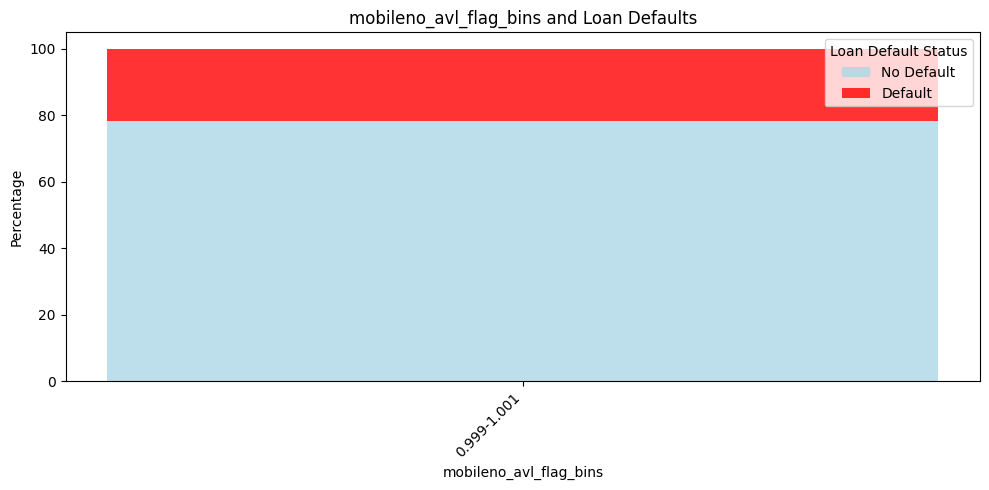

Number of unique values in aadhar_flag: 2
Number of bins: 2


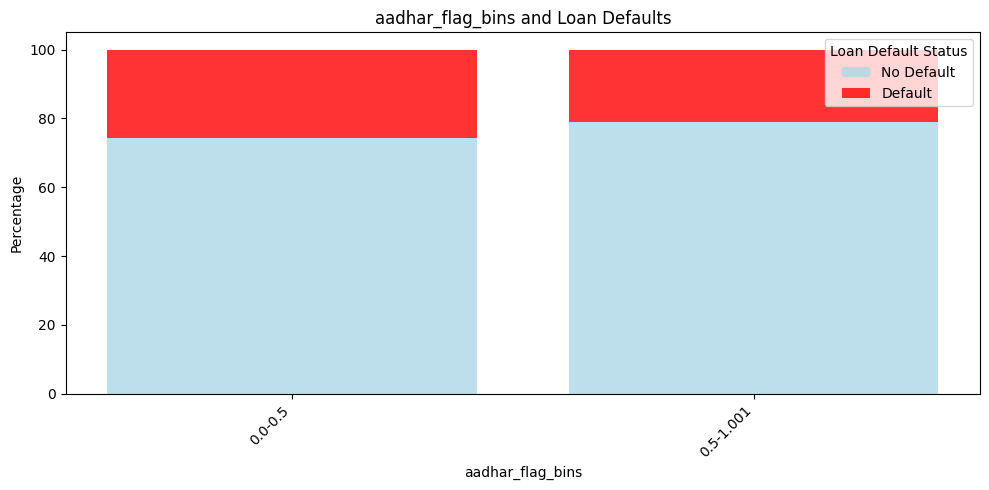

Number of unique values in pan_flag: 2
Number of bins: 2


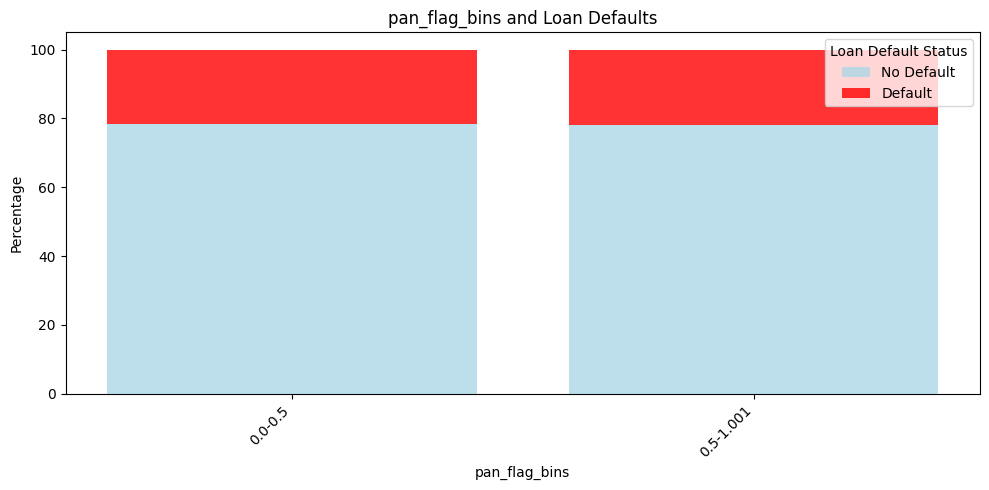

Number of unique values in voterid_flag: 2
Number of bins: 2


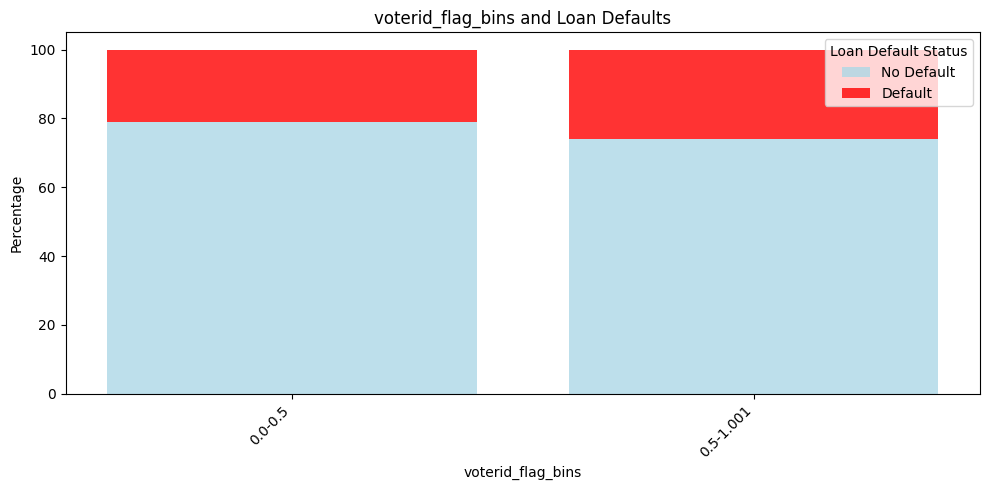

Number of unique values in driving_flag: 2
Number of bins: 2


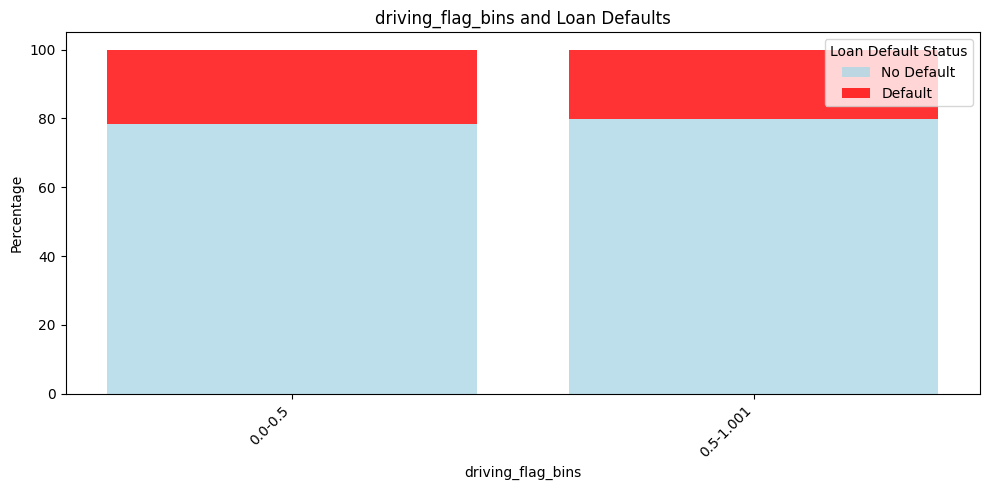

Number of unique values in passport_flag: 2
Number of bins: 2


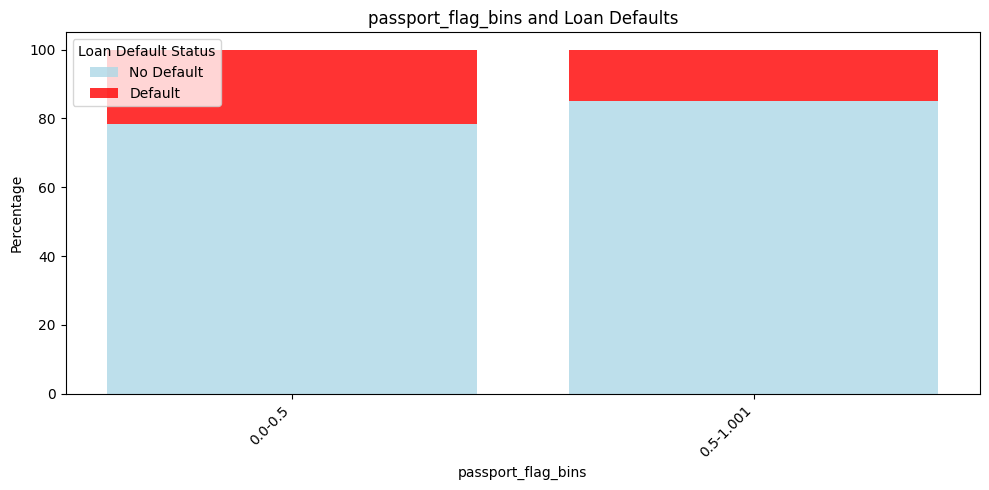

Number of unique values in perform_cns_score: 573
Number of bins: 30


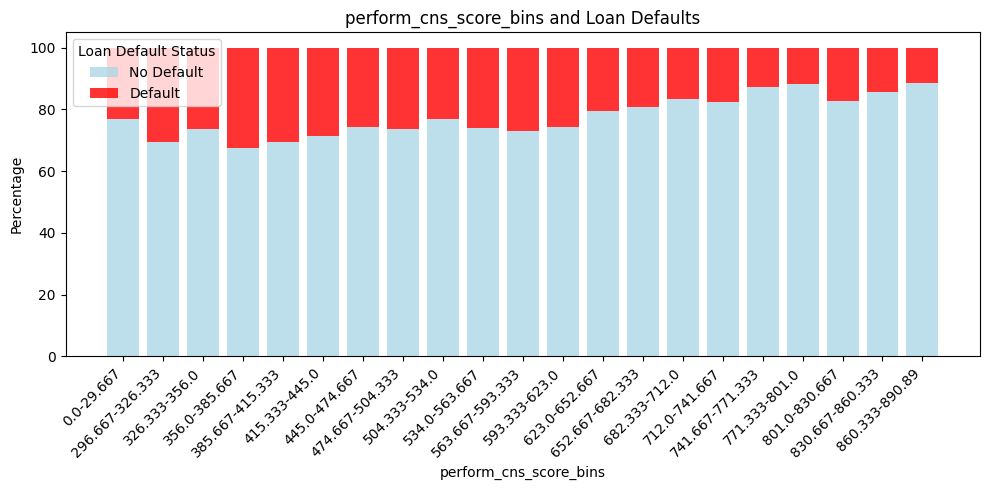

Number of unique values in pri_no_of_accts: 108
Number of bins: 30


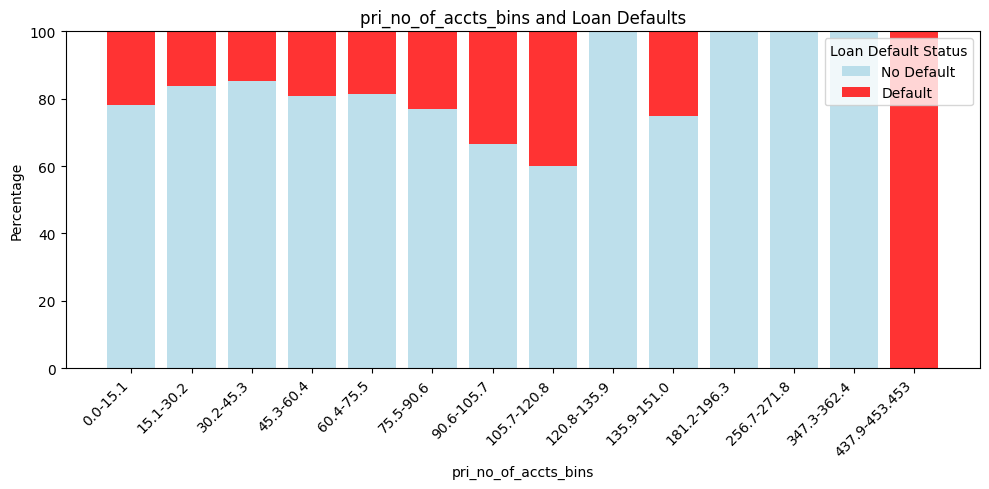

Number of unique values in pri_active_accts: 40
Number of bins: 30


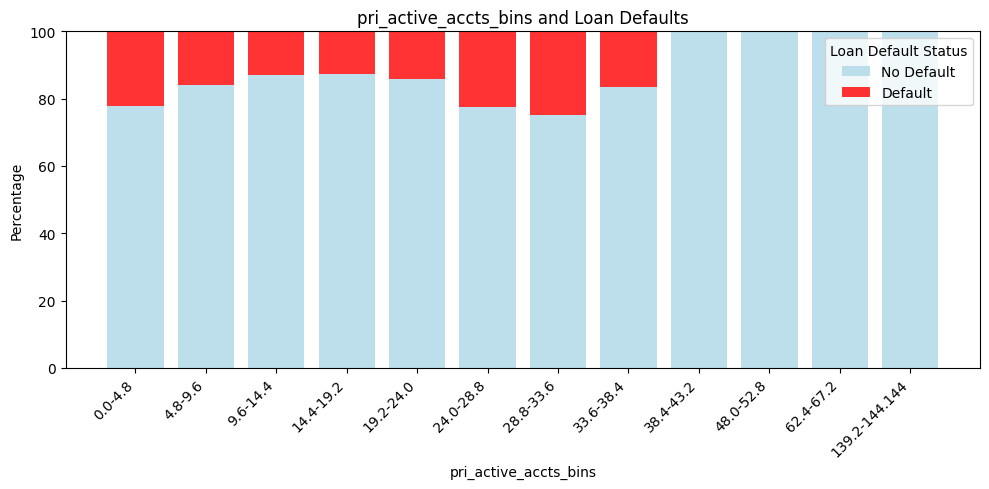

Number of unique values in pri_overdue_accts: 22
Number of bins: 22


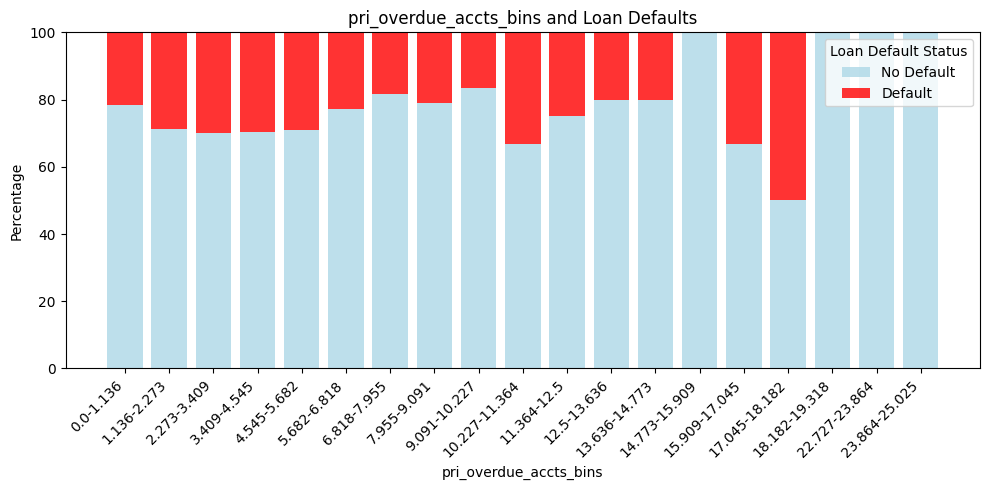

Number of unique values in pri_current_balance: 71341
Number of bins: 30


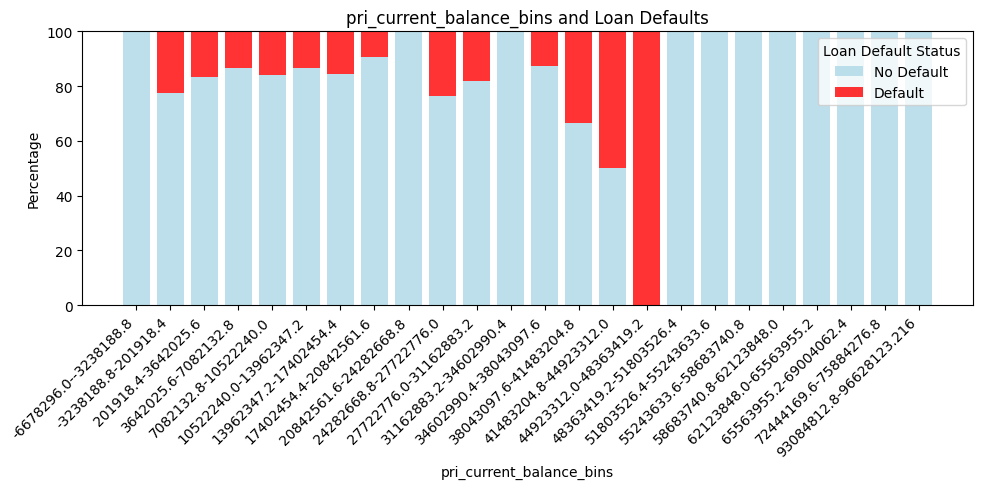

Number of unique values in pri_sanctioned_amount: 44390
Number of bins: 30


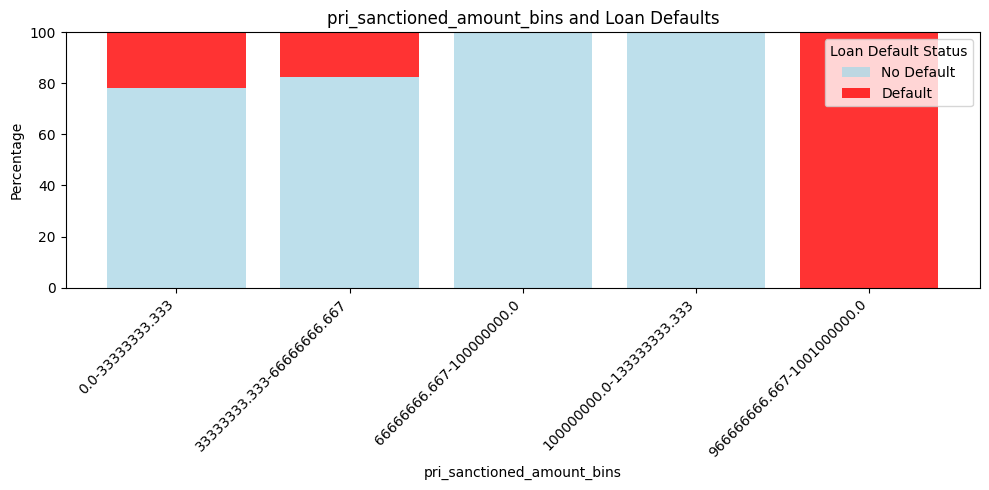

Number of unique values in pri_disbursed_amount: 47909
Number of bins: 30


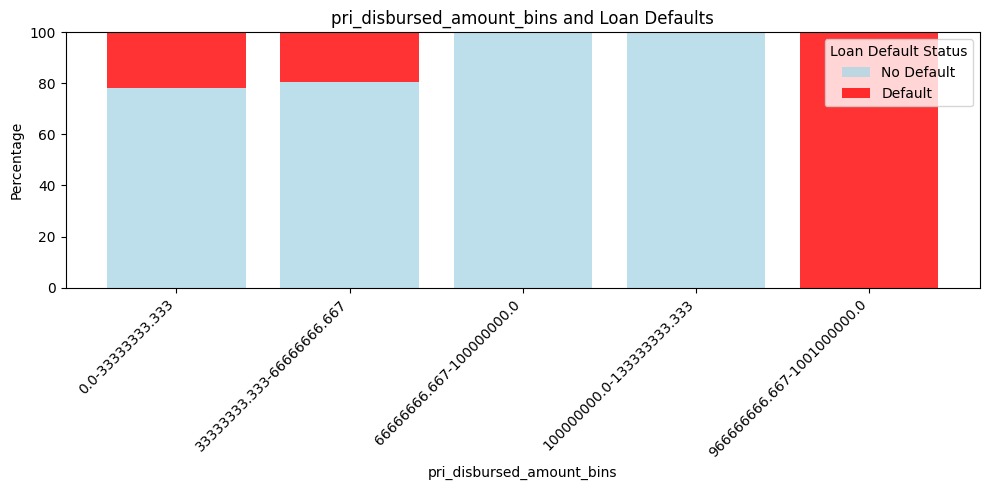

Number of unique values in sec_no_of_accts: 37
Number of bins: 30


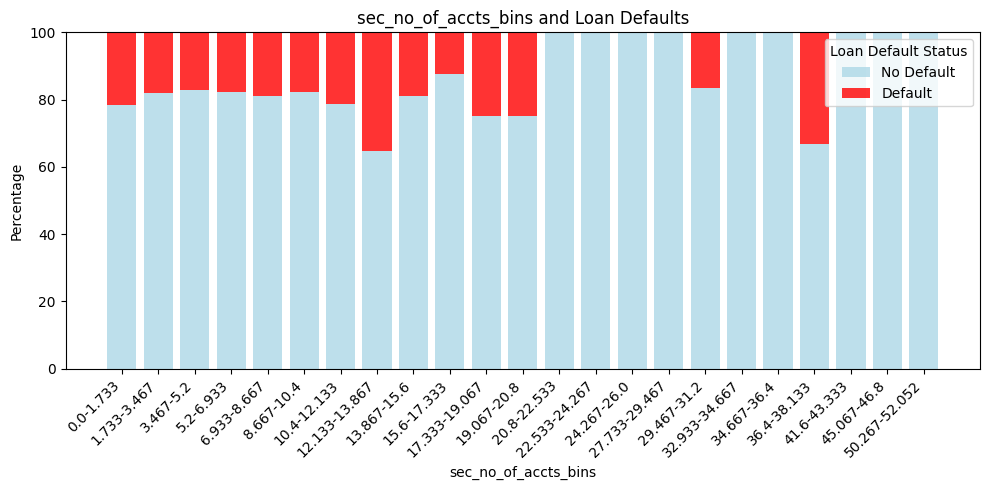

Number of unique values in sec_active_accts: 23
Number of bins: 23


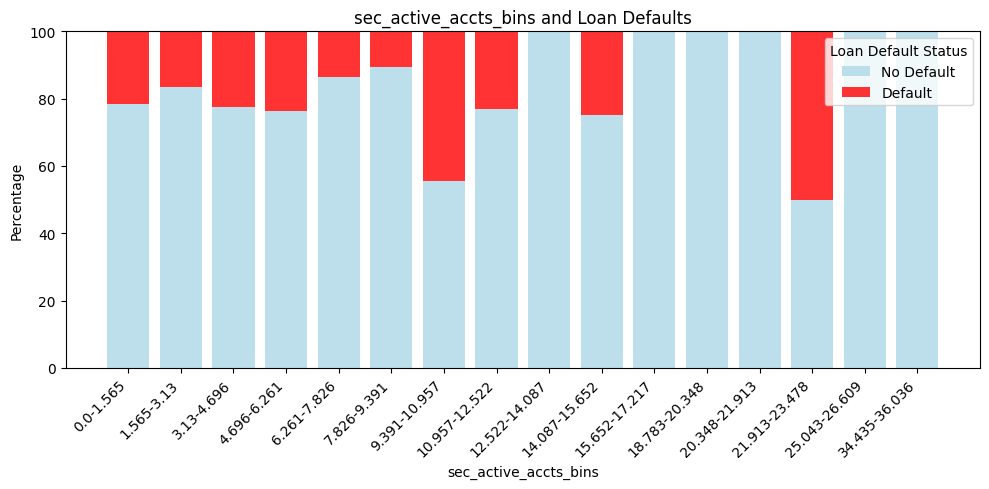

Number of unique values in sec_overdue_accts: 9
Number of bins: 9


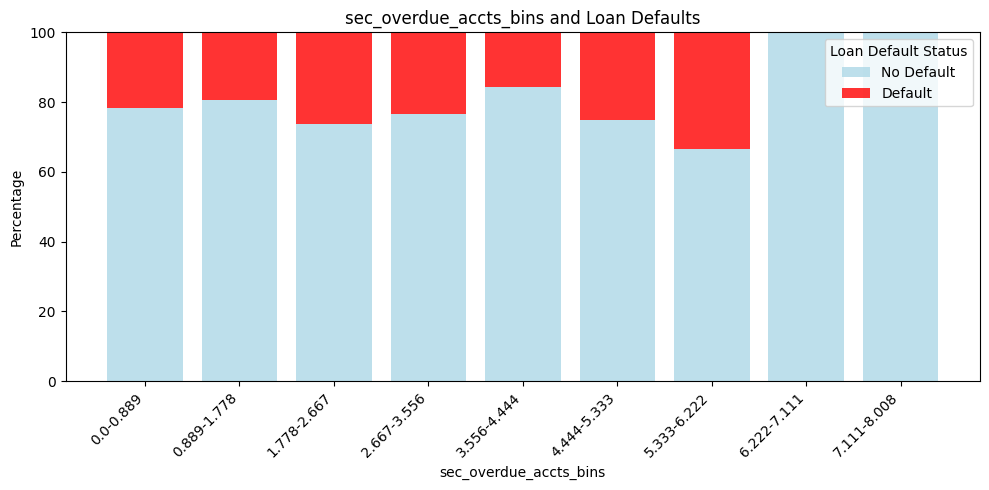

Number of unique values in sec_current_balance: 3246
Number of bins: 30


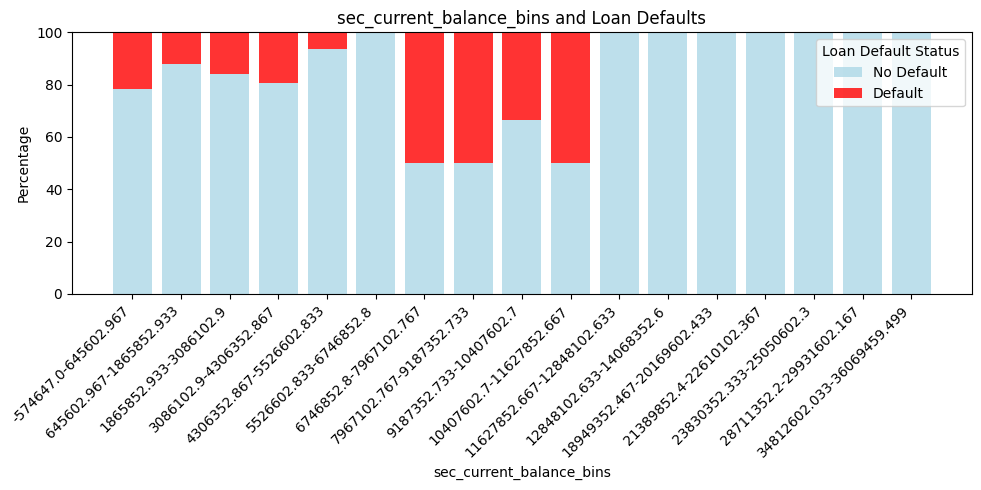

Number of unique values in sec_sanctioned_amount: 2223
Number of bins: 30


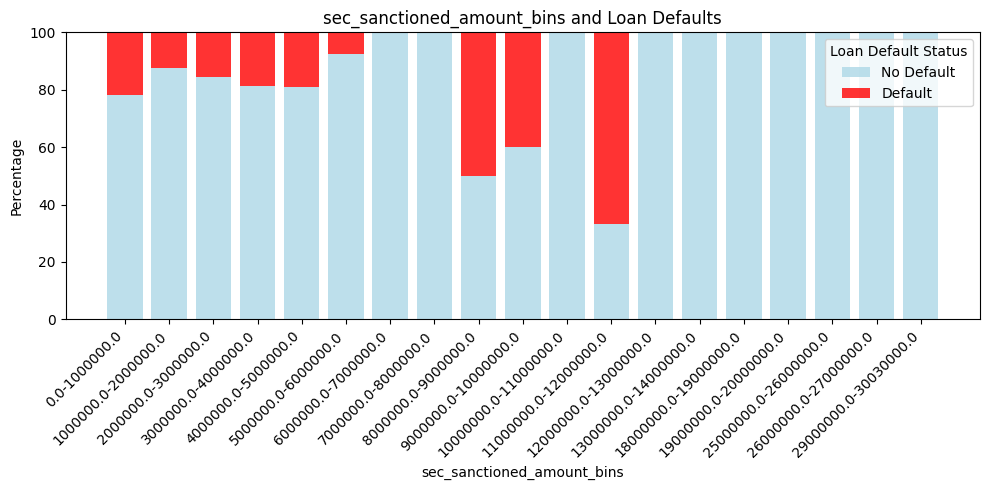

Number of unique values in sec_disbursed_amount: 2553
Number of bins: 30


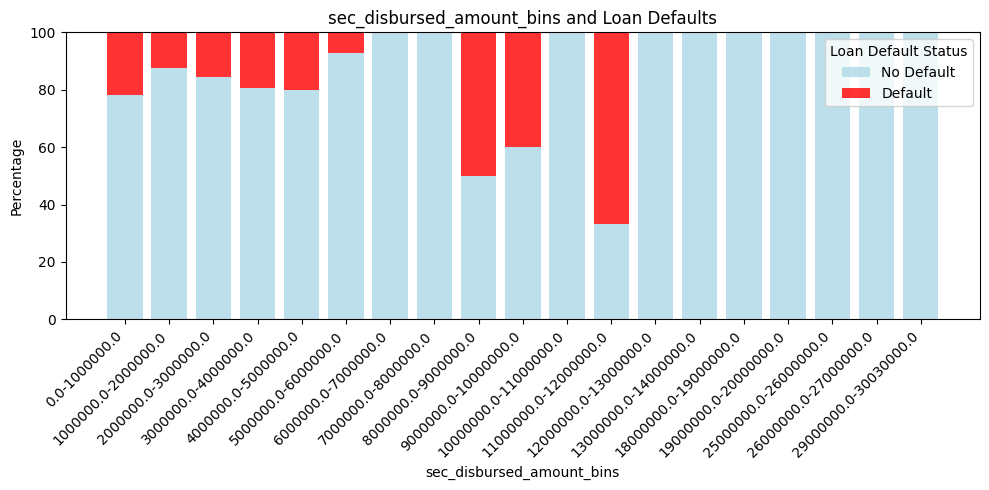

Number of unique values in primary_instal_amt: 28067
Number of bins: 30


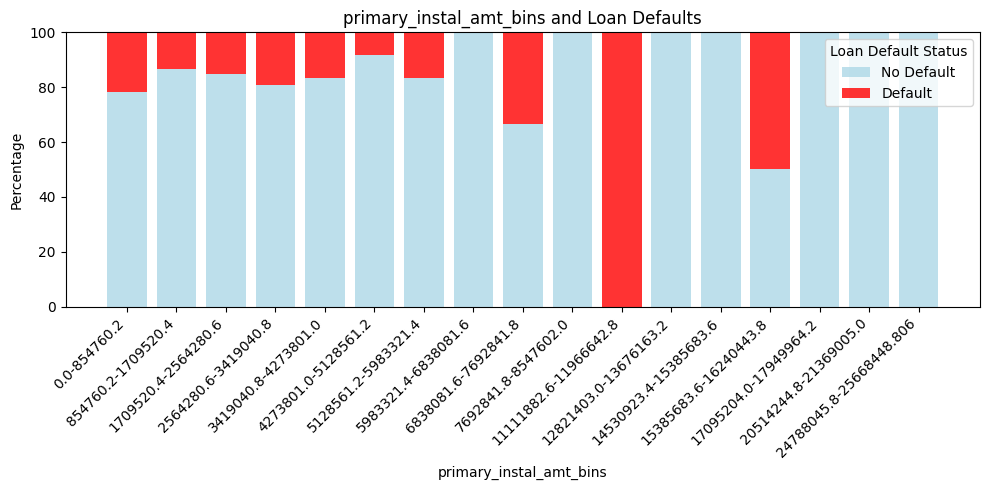

Number of unique values in sec_instal_amt: 1918
Number of bins: 30


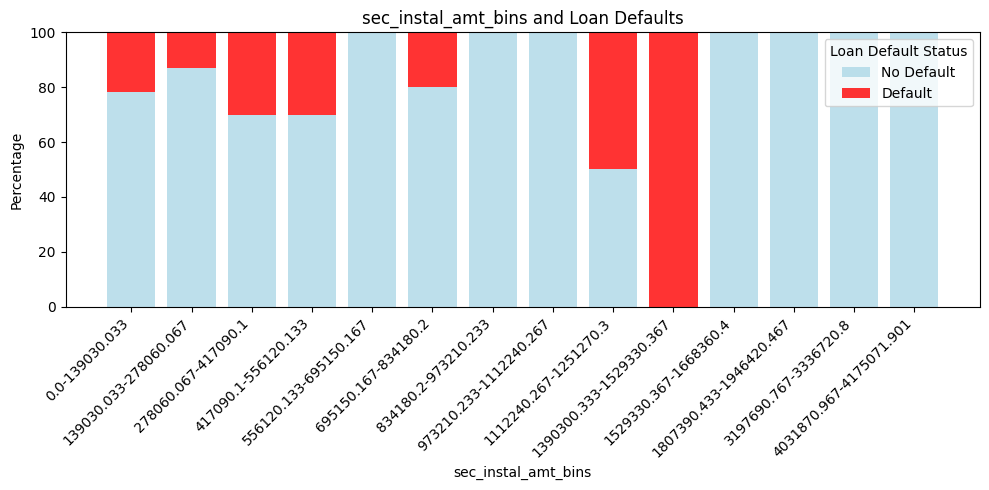

Number of unique values in new_accts_in_last_six_months: 26
Number of bins: 26


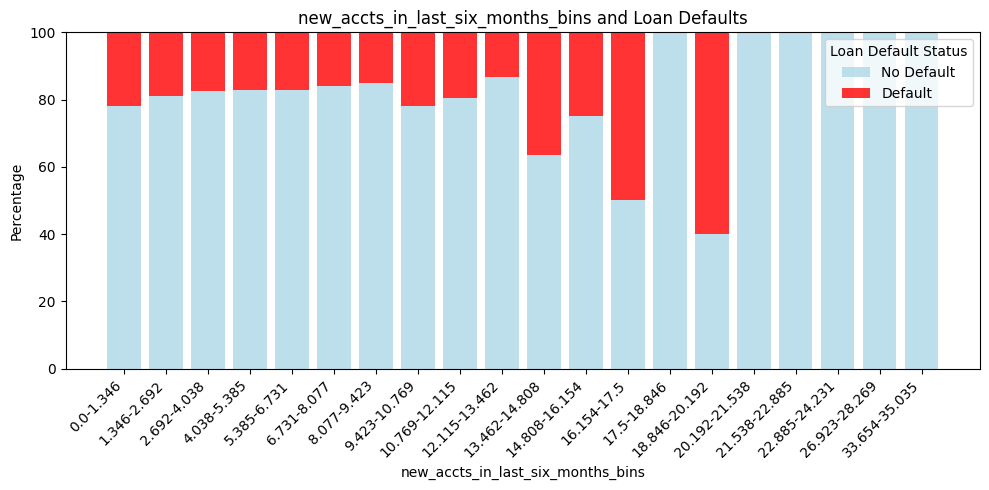

Number of unique values in delinquent_accts_in_last_six_months: 14
Number of bins: 14


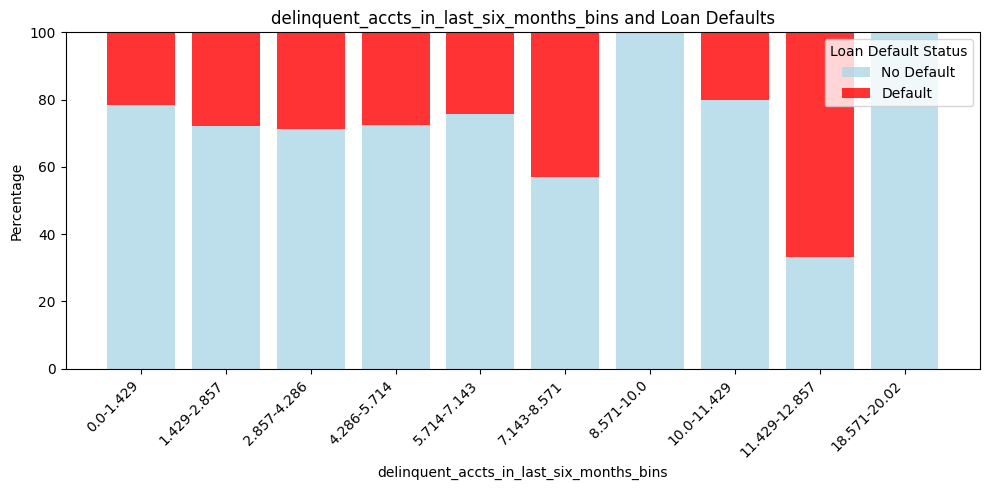

Number of unique values in no_of_inquiries: 25
Number of bins: 25


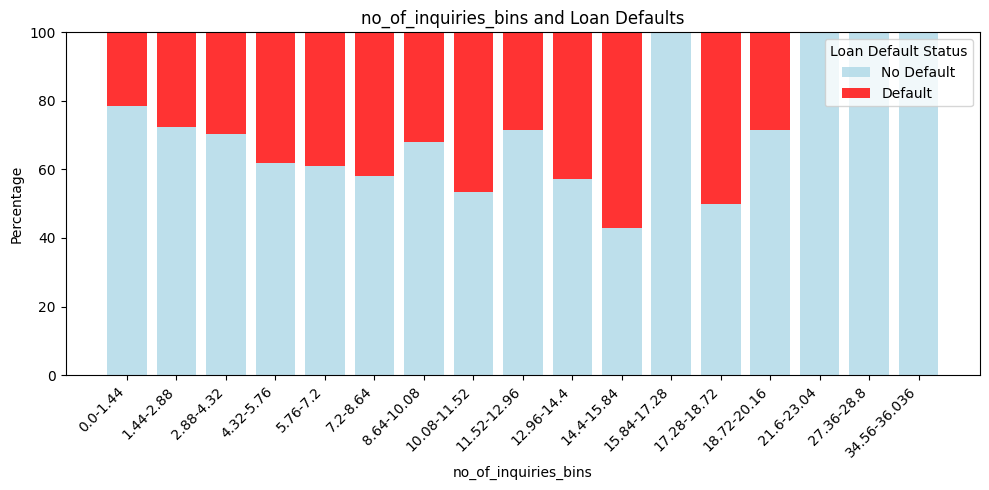

Number of unique values in loan_default: 2
Number of bins: 2


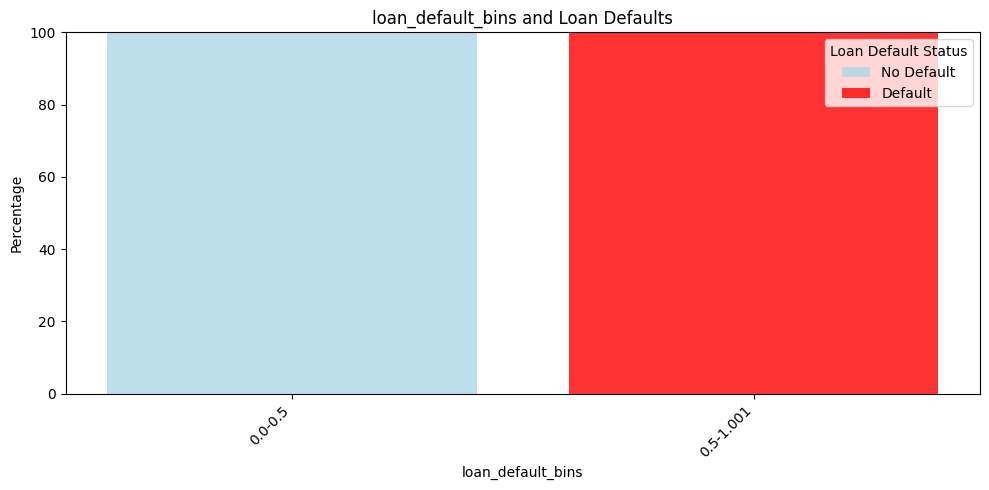

Number of unique values in avg_acct_age: 192
Number of bins: 30


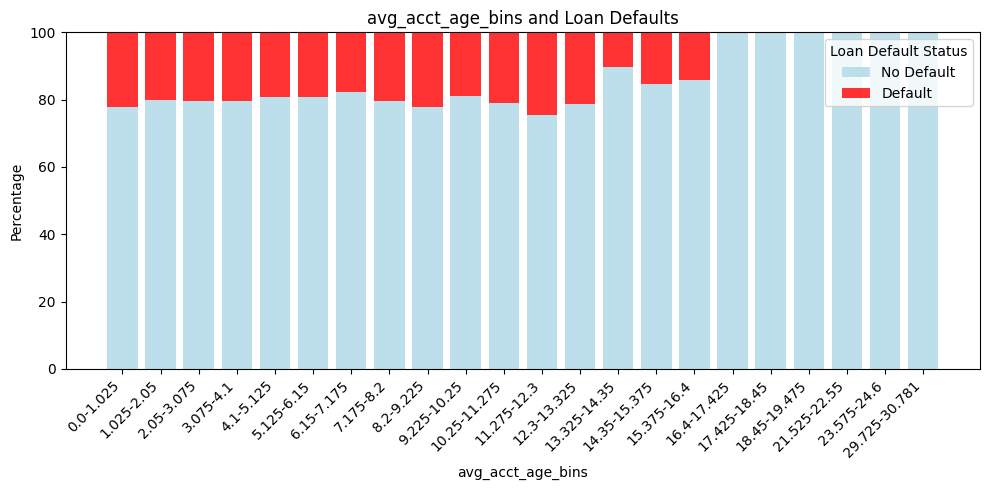

Number of unique values in credit_hist_leng: 294
Number of bins: 30


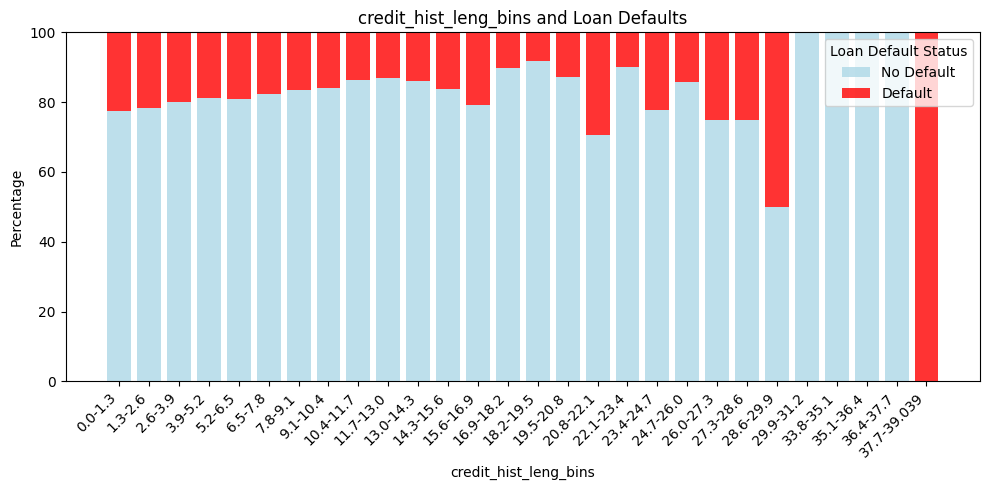

Number of unique values in customer_age: 47
Number of bins: 30


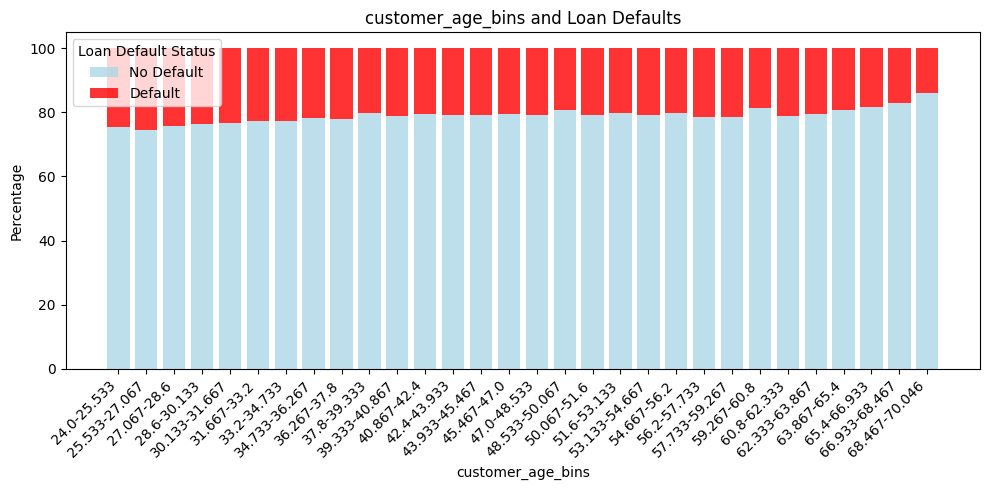

In [ ]:
numeric_features = loan.select_dtypes(include=['int64', 'float64']).columns
numeric_features

for col in numeric_features:
  profile_numeric(col)

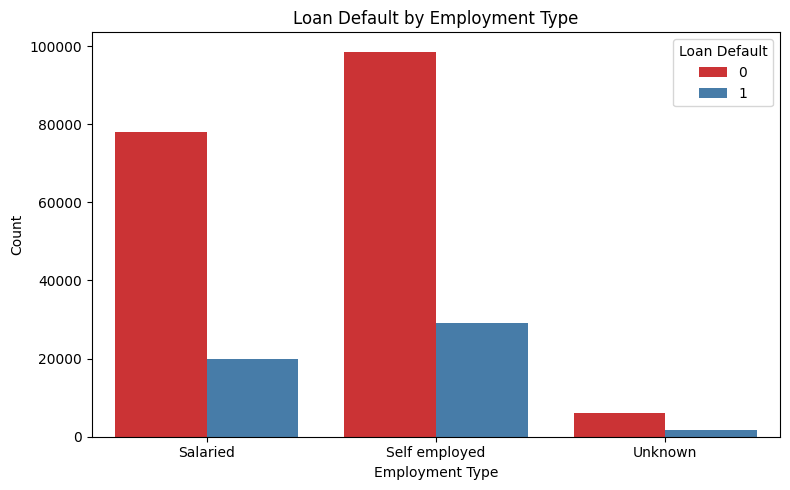

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=loan, x='employment_type', hue='loan_default', palette='Set1')
plt.title('Loan Default by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='Loan Default')
plt.tight_layout()
plt.show()


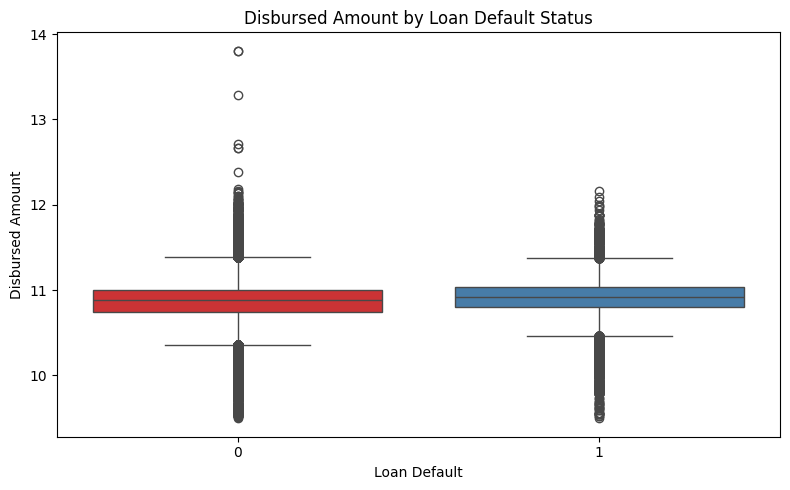

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=loan, x='loan_default', y='disbursed_amount', palette='Set1')
plt.title('Disbursed Amount by Loan Default Status')
plt.xlabel('Loan Default')
plt.ylabel('Disbursed Amount')
plt.tight_layout()
plt.show()


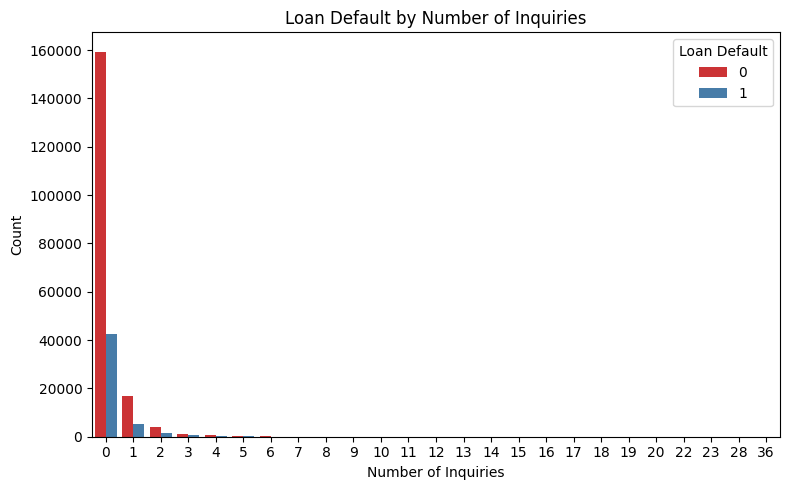

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=loan, x='no_of_inquiries', hue='loan_default', palette='Set1')
plt.title('Loan Default by Number of Inquiries')
plt.xlabel('Number of Inquiries')
plt.ylabel('Count')
plt.legend(title='Loan Default')
plt.tight_layout()
plt.show()


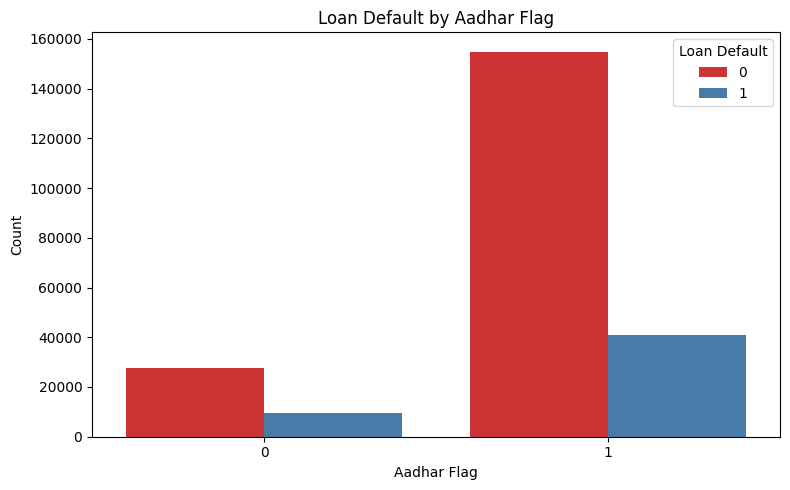

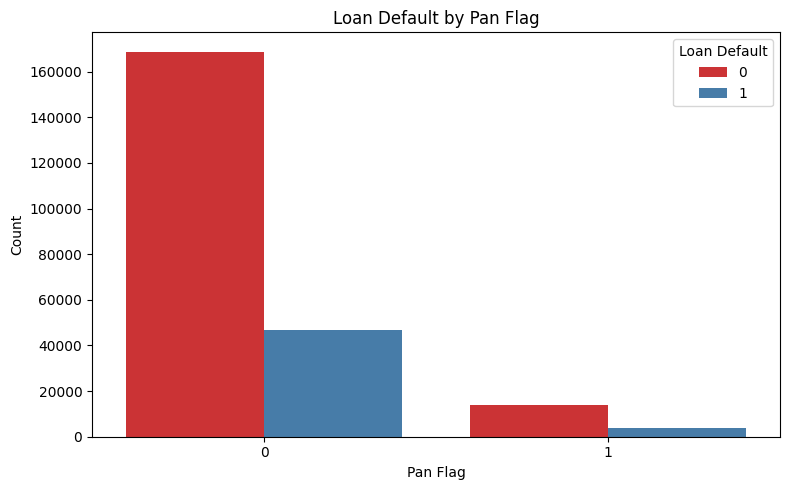

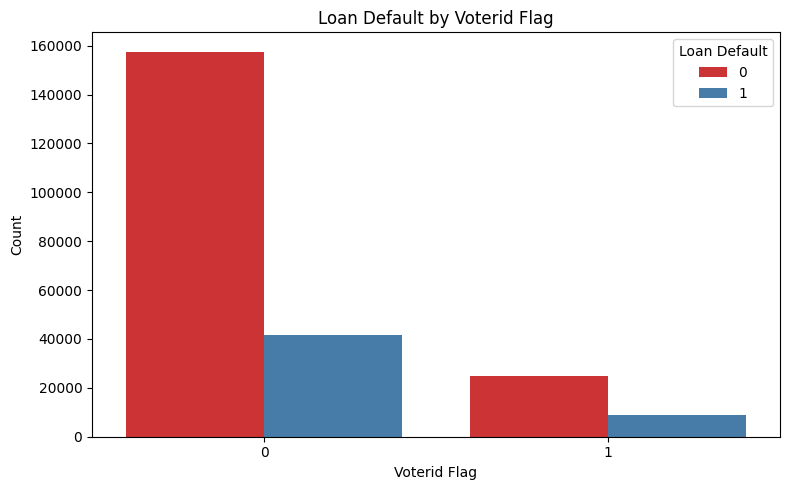

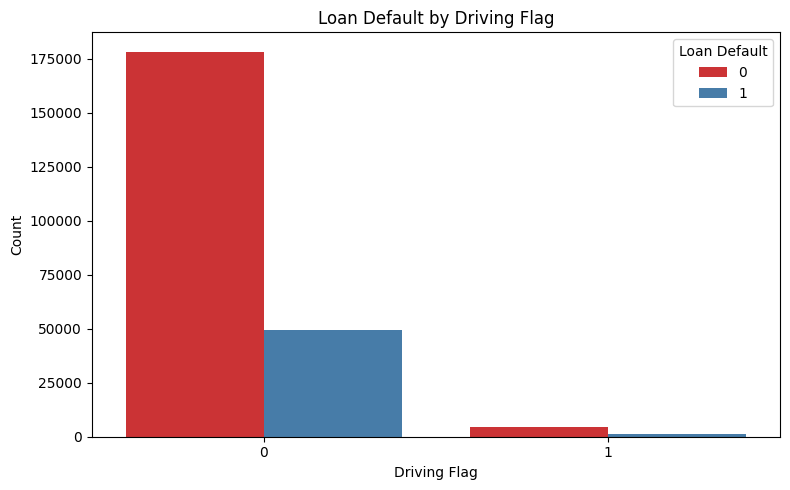

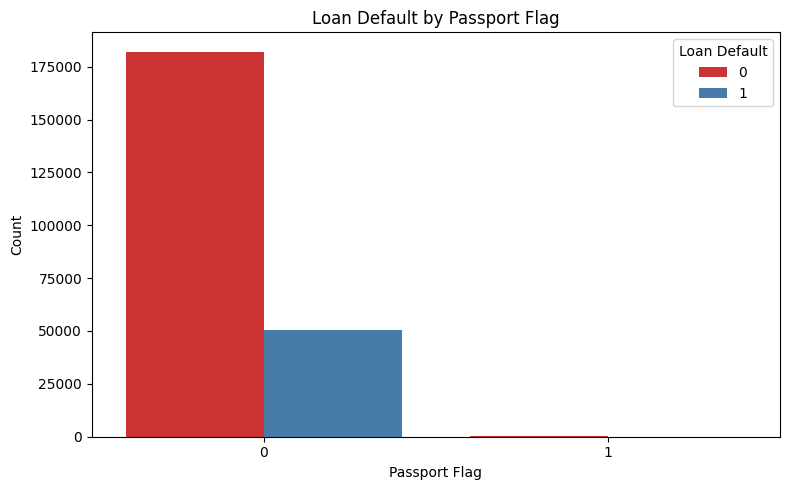

In [ ]:
flag_vars = ['aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag']
for flag in flag_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=loan, x=flag, hue='loan_default', palette='Set1')
    plt.title(f'Loan Default by {flag.replace("_", " ").title()}')
    plt.xlabel(flag.replace("_", " ").title())
    plt.ylabel('Count')
    plt.legend(title='Loan Default')
    plt.tight_layout()
    plt.show()


# Feature Selection

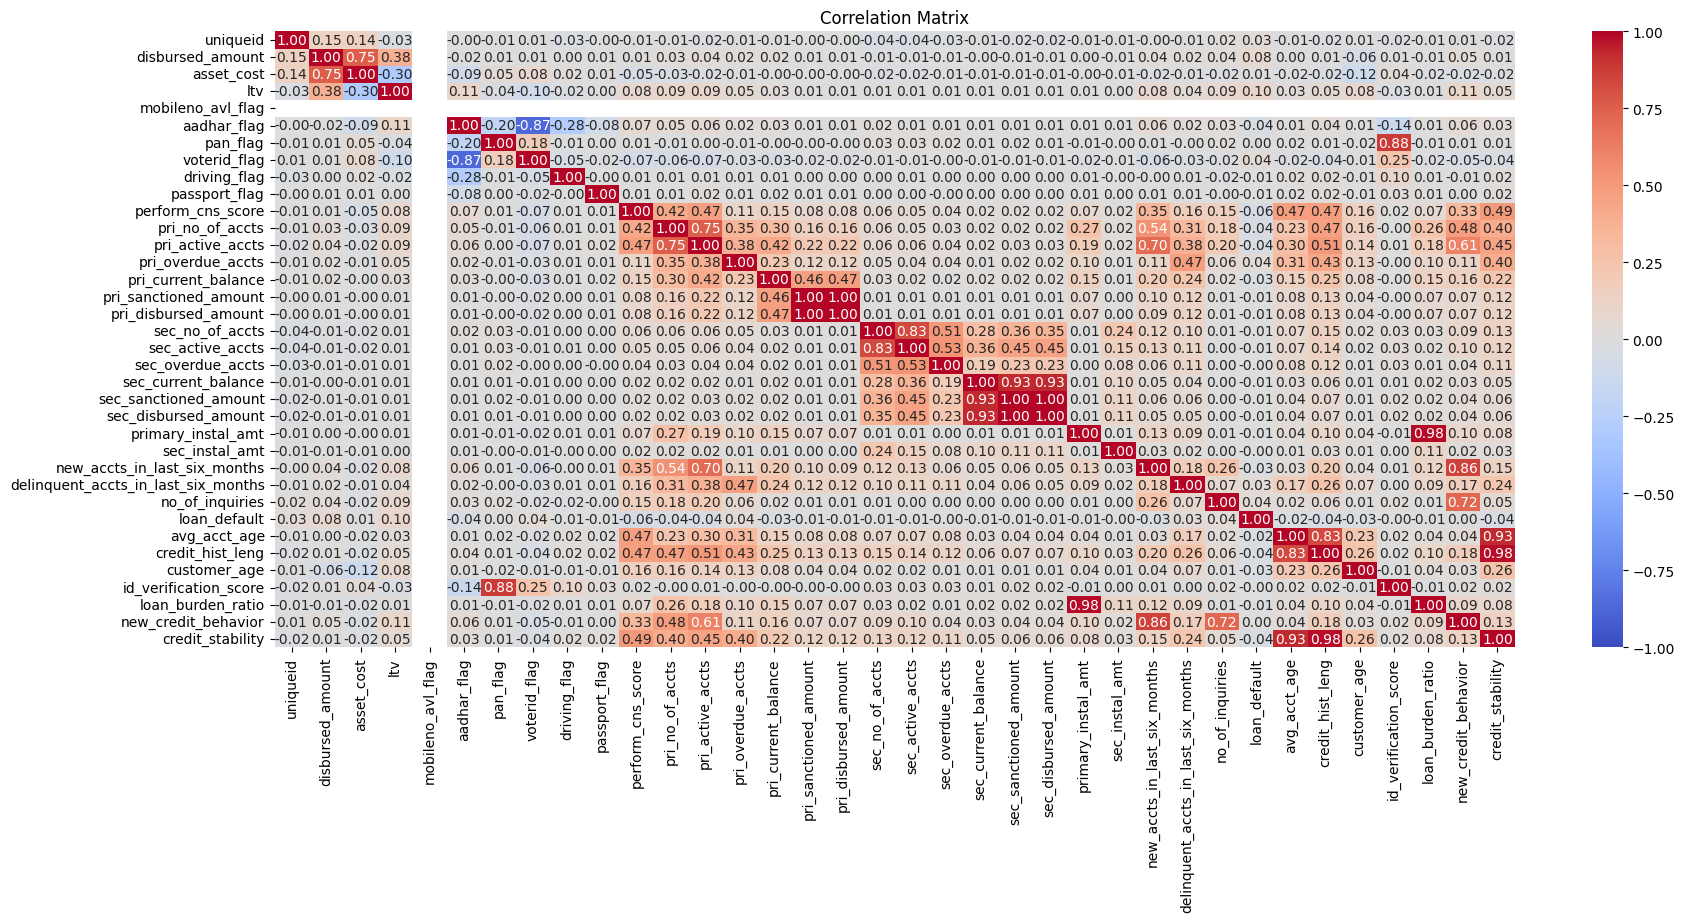

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = loan.select_dtypes(include=['int64', 'float64']).corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Remove features with high correlation (e.g., above 0.85)
threshold = 0.85
corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort").drop_duplicates()
high_corr_features = [col for col in correlation_matrix.columns if any(correlation_matrix[col] > threshold)]


**High Positive Correlations:**

sec_current_balance vs. sec_sanctioned_amount: 0.99

sec_sanctioned_amount vs. sec_disbursed_amount: 0.93

sec_current_balance vs. sec_disbursed_amount: 0.93

pri_sanctioned_amount vs. pri_disbursed_amount: 1.00

**High Negative Correlations:**

aadhar_flag vs. voterid_flag: -0.87

voterid_flag vs. pan_flag: -0.28

asset_cost vs. ltv: -0.30

**Low or No Correlation:**

Many variables exhibit very low or near-zero correlations, indicating no strong linear relationship between them.

These features provide the most relevant and up-to-date information regarding the borrower's credit exposure and are likely more predictive of default.
"sec_current_balance, pri_current_balance, sec_active_accts, pri_active_accts, sec_disbursed_amount."

**Dropping:** sec_instal_amt, pri_disbursed_amount, sec_no_of_accts, pri_no_of_accts, sec_sanctioned_amount.

These features are closely related to the ones you're keeping, and they might add redundancy without providing significantly more predictive power therefore they will be dropped

In [19]:
# Drop highly correlated features based on the correlation matrix
loan = loan.drop(columns=[
    'sec_instal_amt',  # High correlation with sec_current_balance
    'pri_current_balance',  # High correlation with pri_disbursed_amount
    'sec_no_of_accts',  # High correlation with sec_active_accts
    'pri_active_accts',  # High correlation with pri_no_of_accts
    'sec_sanctioned_amount'  # High correlation with sec_disbursed_amount
])

# Proceed with the next steps like training a model, etc.


In [20]:
# Define the threshold based on the value of sec_no_of_accts
threshold = -0.008385

# Filter the DataFrame for values less than 0 and greater than or equal to the threshold
selected_features = correlation_matrix[(correlation_matrix['loan_default'] < 0) &
                                       (correlation_matrix['loan_default'] >= threshold)]['loan_default'].sort_values(ascending=False)
print(f"Selected Features Through correlation analysis are :")
selected_features

Selected Features Through correlation analysis are :


sec_overdue_accts       -0.001371
sec_instal_amt          -0.001548
id_verification_score   -0.001825
sec_current_balance     -0.005531
driving_flag            -0.005821
sec_active_accts        -0.005993
sec_disbursed_amount    -0.006248
sec_sanctioned_amount   -0.006354
passport_flag           -0.007602
sec_no_of_accts         -0.008385
Name: loan_default, dtype: float64

In [21]:
# Get the list of column names corresponding to selected features
columns_to_drop = selected_features.index.tolist()
columns_to_drop = [col for col in columns_to_drop if col not in ['sec_instal_amt', 'sec_sanctioned_amount', 'sec_no_of_accts']]
# Drop those columns from the dataset
loan.drop(columns=columns_to_drop, inplace=True)


In [22]:
loan.columns
print(len(loan.columns))

27


In [23]:

# Define feature matrix and target vector
X = loan.drop(columns=['uniqueid', 'loan_default'], axis=1)
y = loan['loan_default']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



After SMOTE:
loan_default
0    0.666669
1    0.333331
Name: proportion, dtype: float64


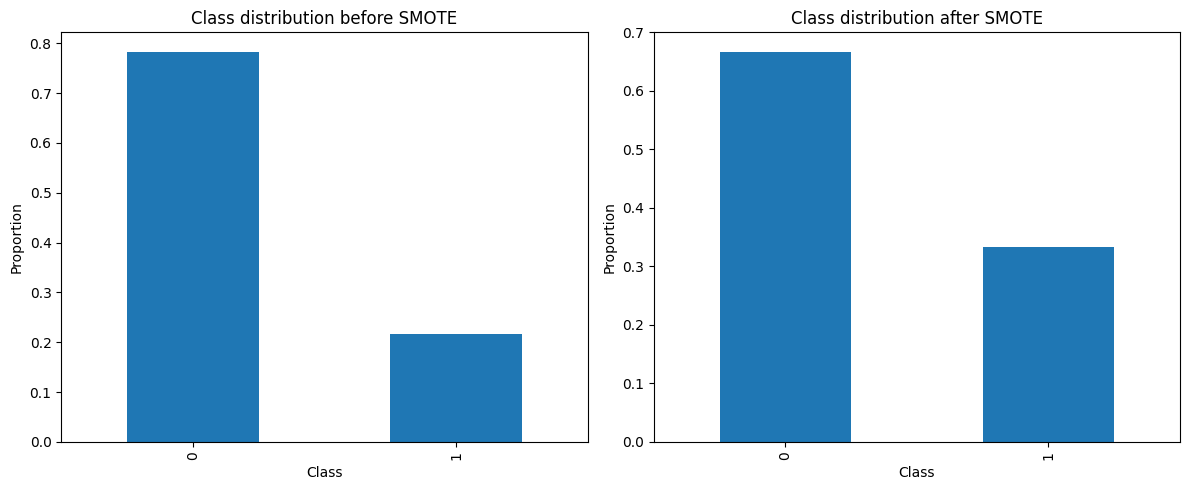

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Define preprocessing pipeline for numerical and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Numeric transformer pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Categorical transformer pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the transformations to the training set
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_preprocessed, y_train)

# After applying SMOTE, let's see the class distribution
print("\nAfter SMOTE:")
print(pd.Series(y_smote).value_counts(normalize=True))

# Plot the class distribution before and after SMOTE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Before SMOTE
y_train.value_counts(normalize=True).plot(kind='bar', ax=axes[0], title='Class distribution before SMOTE')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Proportion')

# After SMOTE
pd.Series(y_smote).value_counts(normalize=True).plot(kind='bar', ax=axes[1], title='Class distribution after SMOTE')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()


Now that our data is ready we can start implementing our models.
First we will start with 
**Logistic Regression**

Training Data Evaluation
Accuracy on training data: 0.6693024246944398

Confusion Matrix on training data:
 [[84818  2698]
 [40755  3127]]

Classification Report on training data:
               precision    recall  f1-score   support

           0       0.68      0.97      0.80     87516
           1       0.54      0.07      0.13     43882

    accuracy                           0.67    131398
   macro avg       0.61      0.52      0.46    131398
weighted avg       0.63      0.67      0.57    131398

Validation Data Evaluation
Accuracy on validation data: 0.6736073059360731

Confusion Matrix on validation data:
 [[21359   624]
 [10098   769]]

Classification Report on validation data:
               precision    recall  f1-score   support

           0       0.68      0.97      0.80     21983
           1       0.55      0.07      0.13     10867

    accuracy                           0.67     32850
   macro avg       0.62      0.52      0.46     32850
weighted avg       0.64      0.

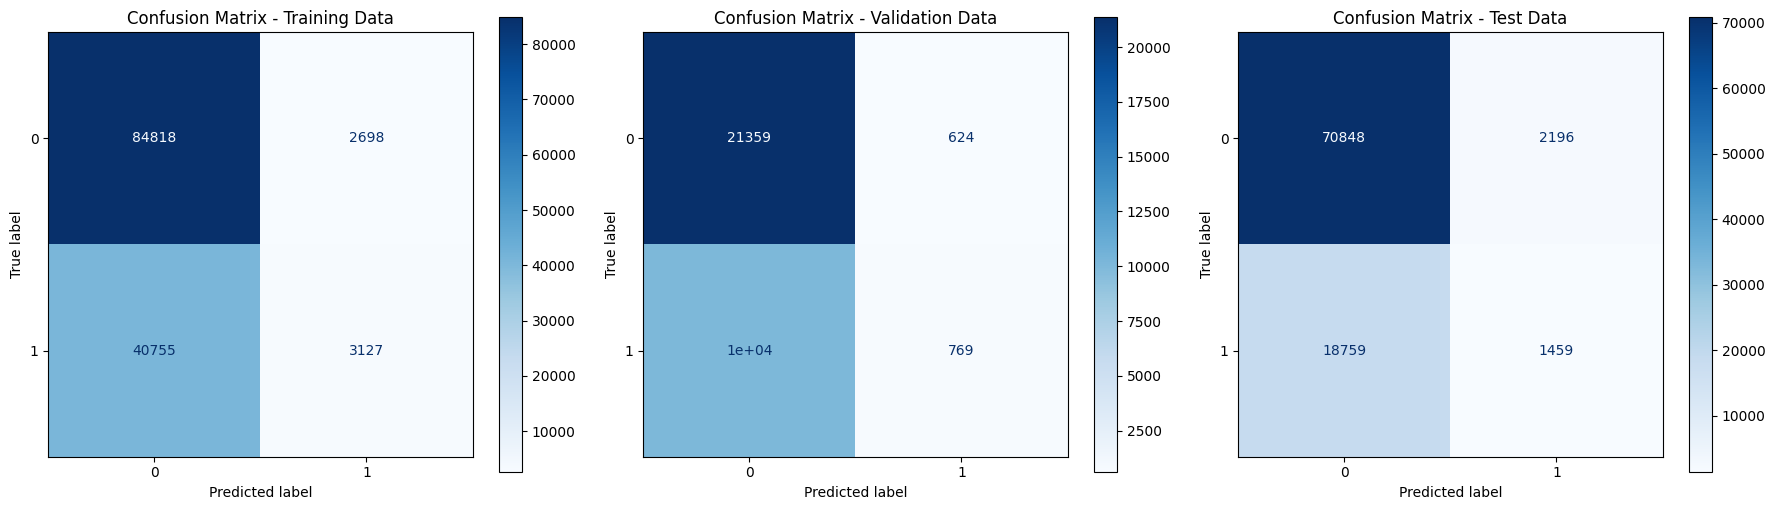

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Initialize the Logistic Regression model
logistic_regression_pipeline = Pipeline([
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the Logistic Regression model on SMOTE-preprocessed data
logistic_regression_pipeline.fit(X_smote, y_smote)

# Split the SMOTE-processed data into train and validation sets
X_train_final, X_valid, y_train_final, y_valid = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Predict on the training set
y_train_pred = logistic_regression_pipeline.predict(X_train_final)

# Evaluate the Logistic Regression model's performance on the training set
print("Training Data Evaluation")
print("Accuracy on training data:", accuracy_score(y_train_final, y_train_pred))
print("\nConfusion Matrix on training data:\n", confusion_matrix(y_train_final, y_train_pred))
print("\nClassification Report on training data:\n", classification_report(y_train_final, y_train_pred))

# Predict on the validation set
y_valid_pred = logistic_regression_pipeline.predict(X_valid)

# Evaluate the Logistic Regression model's performance on the validation set
print("Validation Data Evaluation")
print("Accuracy on validation data:", accuracy_score(y_valid, y_valid_pred))
print("\nConfusion Matrix on validation data:\n", confusion_matrix(y_valid, y_valid_pred))
print("\nClassification Report on validation data:\n", classification_report(y_valid, y_valid_pred))

# Preprocess the test data using the same pipeline
X_test_preprocessed = preprocessor.transform(X_test)

# Predict on the test data using the Logistic Regression model
y_test_pred = logistic_regression_pipeline.predict(X_test_preprocessed)

# Evaluate the model's performance on the test data
print("Test Data Evaluation")
print("Accuracy on test data:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix on test data:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report on test data:\n", classification_report(y_test, y_test_pred))

# Plot graphical confusion matrices for training, validation, and test sets
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Confusion matrix for training set
ConfusionMatrixDisplay.from_predictions(y_train_final, y_train_pred, ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix - Training Data')

# Confusion matrix for validation set
ConfusionMatrixDisplay.from_predictions(y_valid, y_valid_pred, ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion Matrix - Validation Data')

# Confusion matrix for test set
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axes[2], cmap='Blues')
axes[2].set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()


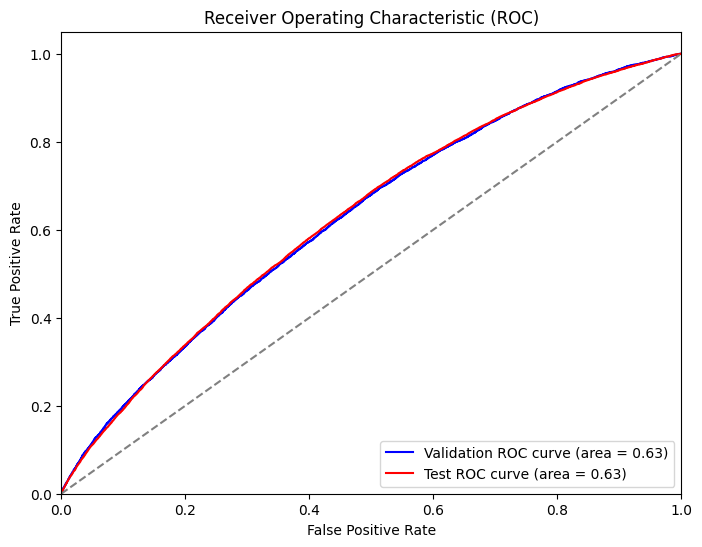

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the validation and test sets
y_valid_prob = logistic_regression_pipeline.predict_proba(X_valid)[:, 1]
y_test_prob = logistic_regression_pipeline.predict_proba(X_test_preprocessed)[:, 1]

# Calculate ROC AUC for validation and test sets
roc_auc_valid = roc_auc_score(y_valid, y_valid_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

# Calculate ROC curves
fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Plot ROC curves
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fpr_valid, tpr_valid, color='blue', label=f'Validation ROC curve (area = {roc_auc_valid:.2f})')
ax.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (area = {roc_auc_test:.2f})')
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC)')
ax.legend(loc='lower right')

plt.show()


**Since the results are not promising we will try to tune our hyperparameters using GridSearch CV**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize the Logistic Regression pipeline
logistic_regression_pipeline = Pipeline([
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__solver': ['liblinear', 'saga'],  # Different solvers for optimization
    'logreg__penalty': ['l1', 'l2'],  # Regularization type
    'logreg__class_weight': [None, 'balanced']  # Handling class imbalance
}

# Initialize GridSearchCV with the logistic regression pipeline
grid_search_logreg = GridSearchCV(logistic_regression_pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the model using GridSearchCV on the SMOTE-preprocessed data
grid_search_logreg.fit(X_smote, y_smote)

# Print the best parameters and best score found by GridSearchCV
print("Best Score on tuned model:", grid_search_logreg.best_score_)
print("Best Parameters after model tuning:\n", grid_search_logreg.best_params_)

# Use the best estimator for final model evaluation on validation set
best_logreg_model = grid_search_logreg.best_estimator_


Best Score on tuned model: 0.669865074324455
Best Parameters after model tuning:
 {'logreg__C': 0.1, 'logreg__class_weight': None, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize the Logistic Regression pipeline
logistic_regression_pipeline = Pipeline([
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__solver': ['liblinear', 'saga'],  # Different solvers for optimization
    'logreg__penalty': ['l1', 'l2'],  # Regularization type
    'logreg__class_weight': [None, 'balanced']  # Handling class imbalance
}

# Initialize GridSearchCV with the logistic regression pipeline
grid_search_logreg = GridSearchCV(logistic_regression_pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the model using GridSearchCV on the SMOTE-preprocessed data
grid_search_logreg.fit(X_smote, y_smote)

# Print the best parameters and best score found by GridSearchCV
print("Best Score on tuned model:", grid_search_logreg.best_score_)
print("Best Parameters after model tuning:\n", grid_search_logreg.best_params_)

# Use the best estimator for final model evaluation on validation set
best_logreg_model = grid_search_logreg.best_estimator_


Best Score on tuned model: 0.6697737469727377
Best Parameters after model tuning:
 {'logreg__C': 10, 'logreg__class_weight': None, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}


In [26]:
# Split the SMOTE-processed data into train and validation sets
X_train_final, X_valid, y_train_final, y_valid = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Predict on the validation set
y_valid_pred = best_logreg_model.predict(X_valid)

# Evaluate the model's performance on the validation set
print("Validation Data Evaluation")
print("Accuracy on validation data:", accuracy_score(y_valid, y_valid_pred))
print("\nConfusion Matrix on validation data:\n", confusion_matrix(y_valid, y_valid_pred))
print("\nClassification Report on validation data:\n", classification_report(y_valid, y_valid_pred))

# Preprocess the test data using the same pipeline
X_test_preprocessed = preprocessor.transform(X_test)

# Predict on the test data using the best Logistic Regression model
y_test_pred = best_logreg_model.predict(X_test_preprocessed)

# Evaluate the model's performance on the test data
print("Test Data Evaluation")
print("Accuracy on test data:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix on test data:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report on test data:\n", classification_report(y_test, y_test_pred))


Validation Data Evaluation
Accuracy on validation data: 0.6743683409436834

Confusion Matrix on validation data:
 [[21411   572]
 [10125   742]]

Classification Report on validation data:
               precision    recall  f1-score   support

           0       0.68      0.97      0.80     21983
           1       0.56      0.07      0.12     10867

    accuracy                           0.67     32850
   macro avg       0.62      0.52      0.46     32850
weighted avg       0.64      0.67      0.58     32850

Test Data Evaluation
Accuracy on test data: 0.7760288220282645

Confusion Matrix on test data:
 [[70993  2051]
 [18837  1381]]

Classification Report on test data:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87     73044
           1       0.40      0.07      0.12     20218

    accuracy                           0.78     93262
   macro avg       0.60      0.52      0.49     93262
weighted avg       0.71      0.78      0.71    

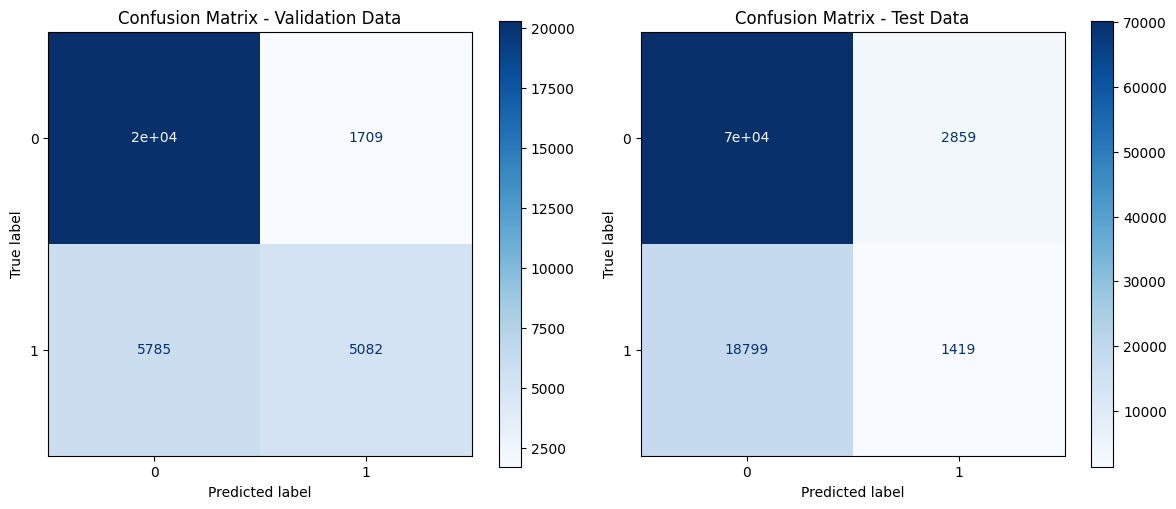

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Assuming the variables are defined and predictions are made:
# y_valid, y_valid_pred, y_test, y_test_pred

# Confusion matrix for validation set
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Confusion matrix for validation set
ConfusionMatrixDisplay(conf_matrix_valid).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix - Validation Data')

# Confusion matrix for test set
ConfusionMatrixDisplay(conf_matrix_test).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()


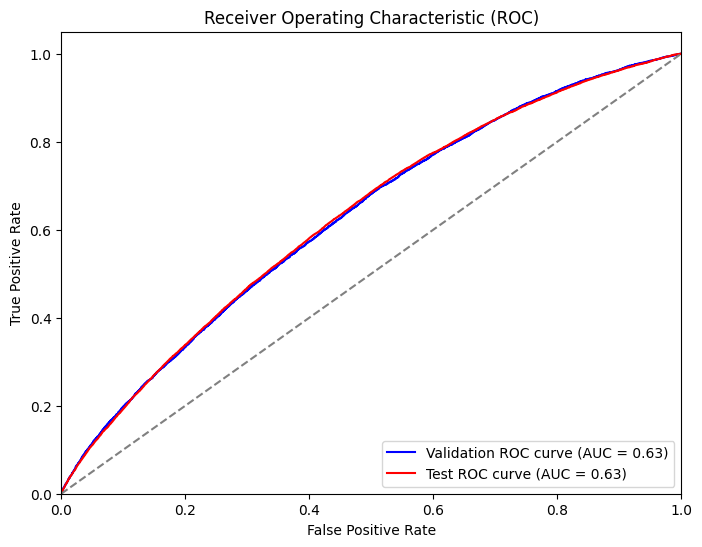

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the validation and test sets using the best model
y_valid_prob = best_logreg_model.predict_proba(X_valid)[:, 1]
y_test_prob = best_logreg_model.predict_proba(X_test_preprocessed)[:, 1]

# Calculate ROC AUC for validation and test sets
roc_auc_valid = roc_auc_score(y_valid, y_valid_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

# Calculate ROC curves
fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Plot ROC curves
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting ROC for Validation Data
ax.plot(fpr_valid, tpr_valid, color='blue', label=f'Validation ROC curve (AUC = {roc_auc_valid:.2f})')

# Plotting ROC for Test Data
ax.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')

# Plotting the diagonal line (chance level)
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Setting limits, labels, and title
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC)')

# Adding the legend in the lower right
ax.legend(loc='lower right')

# Display the plot
plt.show()


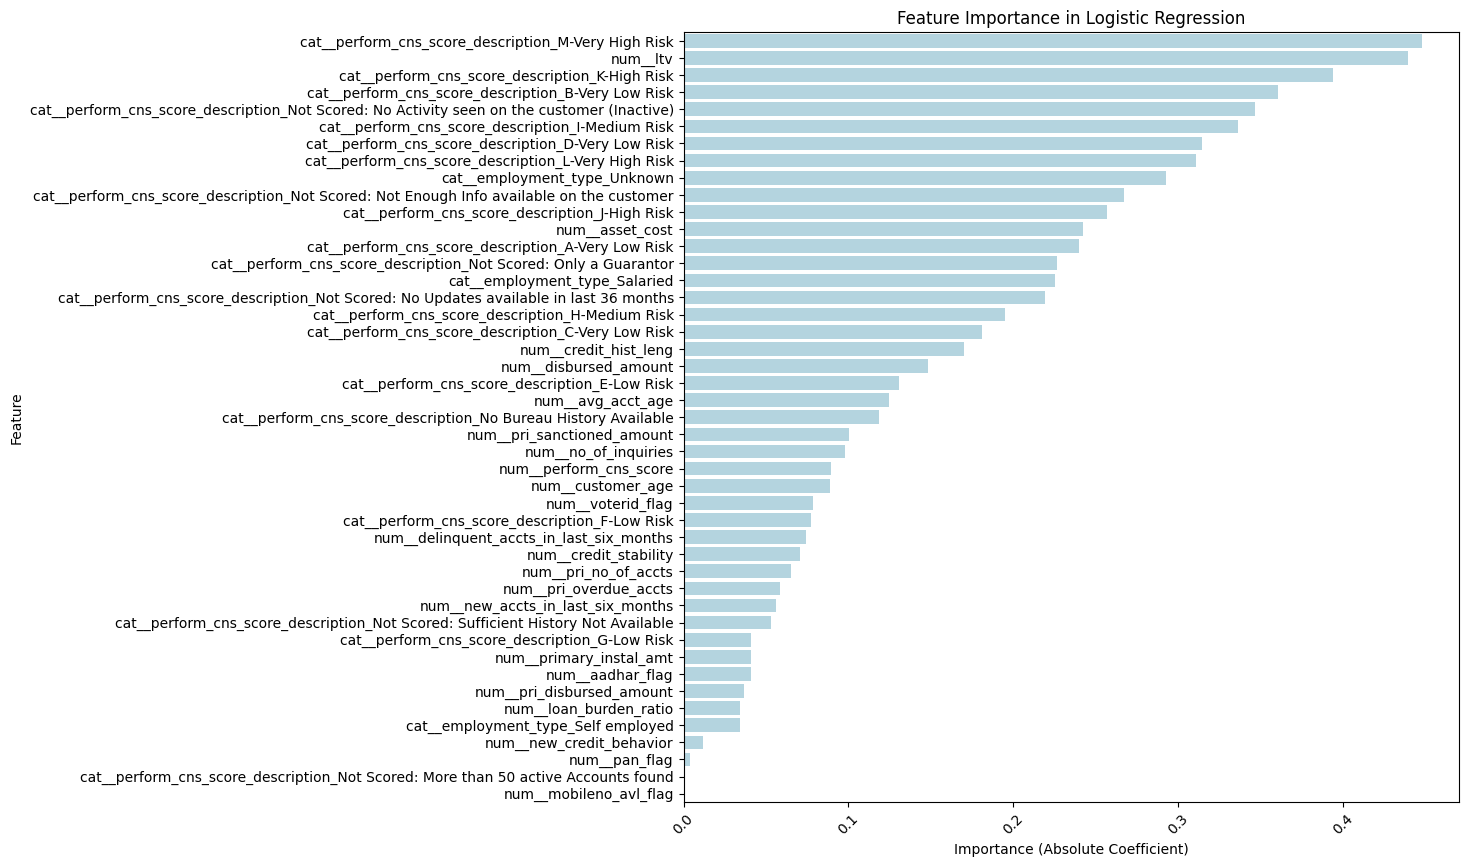

In [53]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the logistic regression model is trained
# This should already be done in your existing pipeline
logistic_model = logistic_regression_pipeline.named_steps['logreg']

# Retrieve the feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Get the coefficients from the logistic regression model
coefficients = logistic_model.coef_[0]

# Combine feature names with their corresponding coefficients
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(coefficients)  # Use absolute value of coefficients to show importance
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Filter to only show features with importance greater than a threshold if necessary
# Here we display all, but you can apply a filter if you prefer
# feature_importances = feature_importances.query('importance > 0.01')

# Plot the feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x="importance", y="feature", data=feature_importances, color="lightblue")
plt.title('Feature Importance in Logistic Regression')
plt.ylabel('Feature')
plt.xlabel('Importance (Absolute Coefficient)')
plt.xticks(rotation=45)
plt.show()


# Random Forest

Validation Data Evaluation
Accuracy on validation data: 0.7718721461187215

Confusion Matrix on validation data:
 [[20274  1709]
 [ 5785  5082]]

Classification Report on validation data:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84     21983
           1       0.75      0.47      0.58     10867

    accuracy                           0.77     32850
   macro avg       0.76      0.69      0.71     32850
weighted avg       0.77      0.77      0.76     32850

Test Data Evaluation
Accuracy on test data: 0.7494263472797066

Confusion Matrix on test data:
 [[67365  5679]
 [17690  2528]]

Classification Report on test data:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85     73044
           1       0.31      0.13      0.18     20218

    accuracy                           0.75     93262
   macro avg       0.55      0.52      0.52     93262
weighted avg       0.69      0.75      0.71    

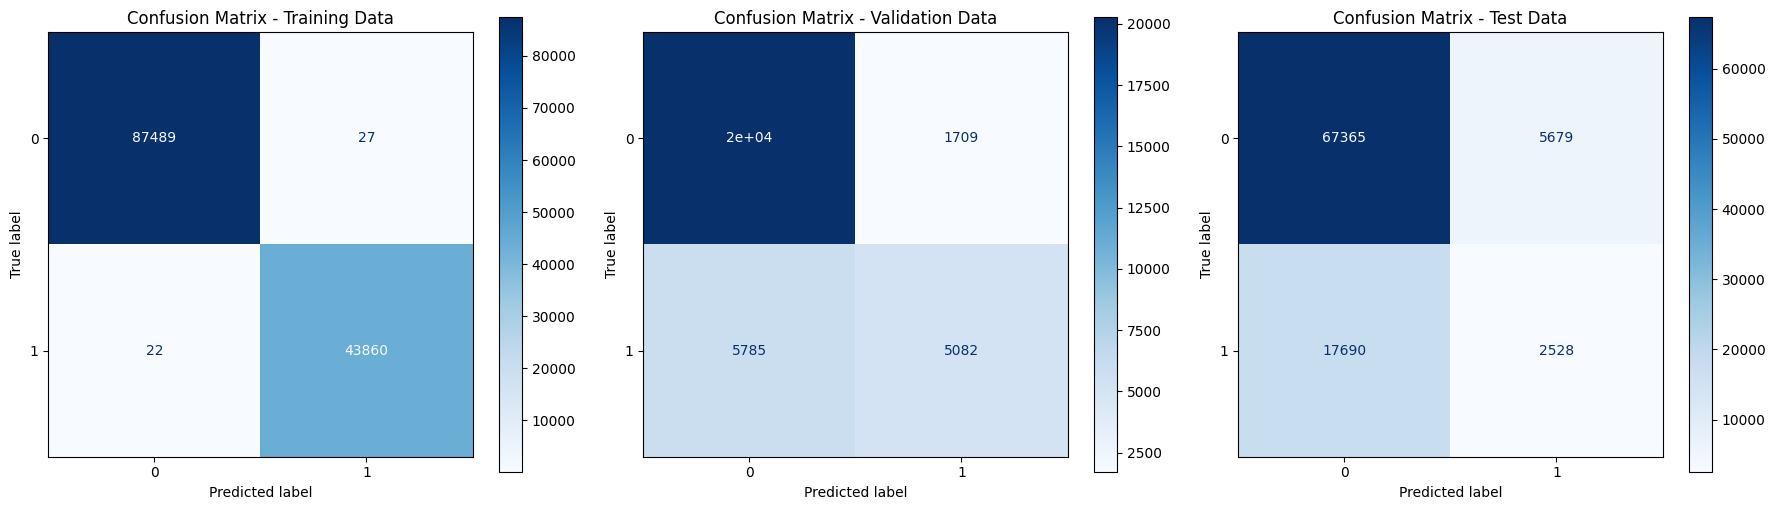

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Split the SMOTE-processed data into train and validation sets
X_train_final, X_valid, y_train_final, y_valid = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Fit the model to the training data
rf_model.fit(X_train_final, y_train_final)

# Predict on the validation set
y_valid_pred = rf_model.predict(X_valid)

# Evaluate the model's performance on the validation set
print("Validation Data Evaluation")
print("Accuracy on validation data:", accuracy_score(y_valid, y_valid_pred))
print("\nConfusion Matrix on validation data:\n", confusion_matrix(y_valid, y_valid_pred))
print("\nClassification Report on validation data:\n", classification_report(y_valid, y_valid_pred))

# Preprocess the test data using the same pipeline
X_test_preprocessed = preprocessor.transform(X_test)

# Predict on the test data using the Random Forest model
y_test_pred = rf_model.predict(X_test_preprocessed)

# Evaluate the model's performance on the test data
print("Test Data Evaluation")
print("Accuracy on test data:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix on test data:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report on test data:\n", classification_report(y_test, y_test_pred))

# Evaluate the model's performance on the training data
y_train_pred = rf_model.predict(X_train_final)
print("Training Data Evaluation")
print("Accuracy on training data:", accuracy_score(y_train_final, y_train_pred))
print("\nConfusion Matrix on training data:\n", confusion_matrix(y_train_final, y_train_pred))
print("\nClassification Report on training data:\n", classification_report(y_train_final, y_train_pred))

# Plot graphical confusion matrices for training, validation, and test sets
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Confusion matrix for training set
ConfusionMatrixDisplay.from_predictions(y_train_final, y_train_pred, ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix - Training Data')

# Confusion matrix for validation set
ConfusionMatrixDisplay.from_predictions(y_valid, y_valid_pred, ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion Matrix - Validation Data')

# Confusion matrix for test set
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axes[2], cmap='Blues')
axes[2].set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()


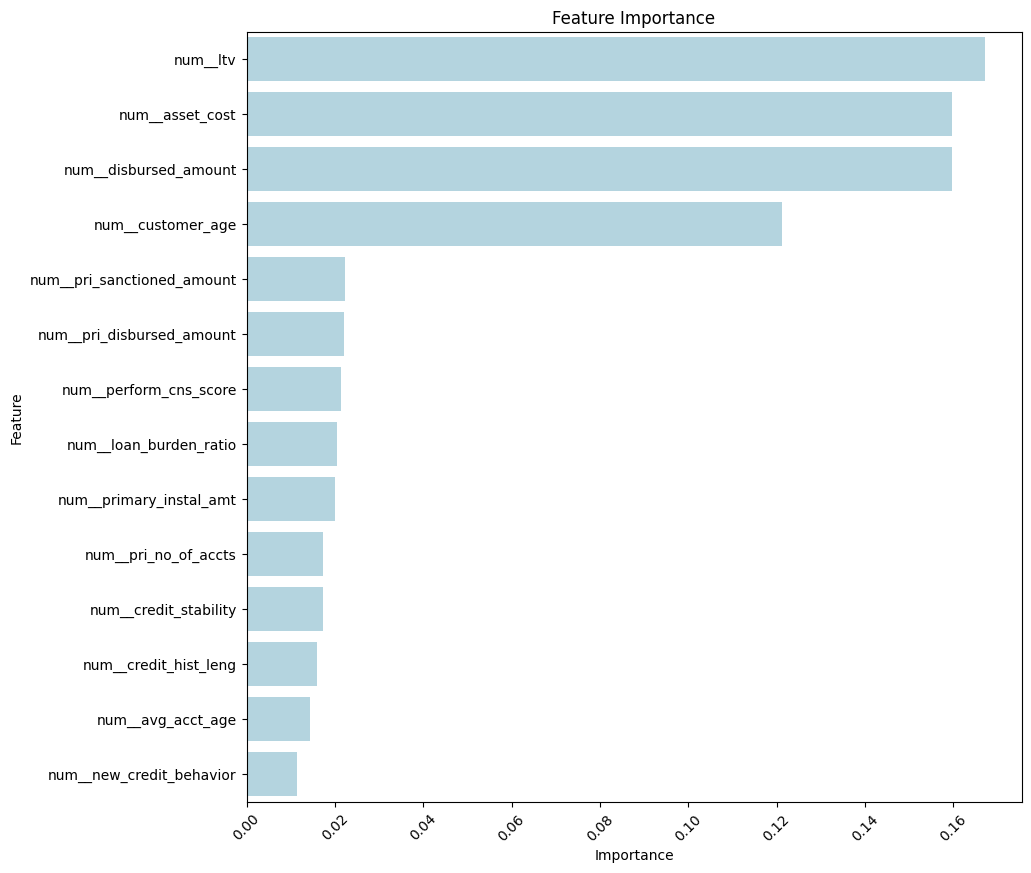

In [32]:
# Get feature importances from the trained Random Forest model
importance = rf_model.feature_importances_

# Retrieve the feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Initialize a dictionary to store feature importances
feature_imp = {}

# Map the feature importances to their respective feature names
for i, v in enumerate(importance):
    items = feature_names[i].split('_')
    if items[0].isdigit():
        # Handle categorical features: combining the feature name with its one-hot encoded category
        fname = categorical_features[int(items[0])] + "_" + items[1]
        feature_imp[fname] = v
    else:
        # Handle numerical features
        feature_imp[feature_names[i]] = v

# Convert the dictionary to a DataFrame for easier manipulation
feature_imp = pd.DataFrame.from_dict(feature_imp, orient='index', columns=['importance'])

# Prepare and filter the DataFrame, focusing on features with importance greater than 0.01
feature_imp = (feature_imp
               .reset_index()
               .rename(columns={'index': 'feature'})
               .sort_values('importance', ascending=False)
               .query('importance > 0.01'))
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x="importance", y="feature", data=feature_imp, color="lightblue")
plt.title('Feature Importance')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Select Important Features
# Get the names of the important features
important_features = feature_imp['feature'].tolist()
important_features = [fname.replace('num__', '') for fname in feature_imp['feature']]

# Filter the training and test data to keep only the important features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]
# X_val_important = X_valid[important_features]

# Step 2: Retrain the Model with Important Features
# Initialize a new Random Forest model
rf_model_important = RandomForestClassifier(random_state=42)

# Train the model on the training data with important features
rf_model_important.fit(X_train_important, y_train)

# Step 3: Evaluate the Model
# Predict on the test and validation datasets
y_pred_test = rf_model_important.predict(X_test_important)
# y_pred_val = rf_model_important.predict(X_val_important)

# Calculate accuracy, confusion matrix, and classification report for test data
print("Test Data Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

# Calculate accuracy, confusion matrix, and classification report for validation data
# print("\nValidation Data Metrics:")
# print("Accuracy:", accuracy_score(y_val, y_pred_val))
# print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))
# print("Classification Report:\n", classification_report(y_val, y_pred_val))


Test Data Metrics:
Accuracy: 0.7721472839956253
Confusion Matrix:
 [[71143  1901]
 [19349   869]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87     73044
           1       0.31      0.04      0.08     20218

    accuracy                           0.77     93262
   macro avg       0.55      0.51      0.47     93262
weighted avg       0.68      0.77      0.70     93262



--- Random Forest ---
Train AUC Score        : 0.999995
Test AUC Score         : 0.786358

--- TEST score thresholds ---
    fpr   tpr  threshold
0  0.01  0.13       0.76
1  0.02  0.24       0.67
2  0.03  0.31       0.62
3  0.04  0.35       0.59
4  0.05  0.39       0.56




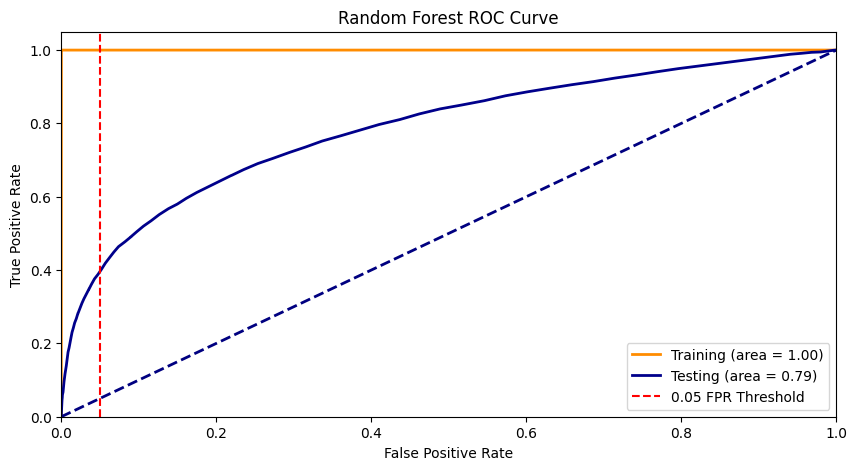

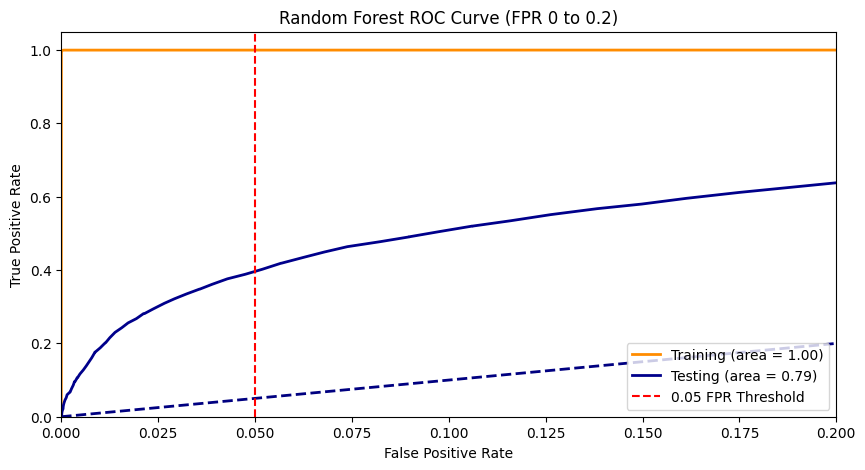

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

def model_auc_roc(model, model_name, X_train, y_train, X_test, y_test):
    # 1. Predict on train and test using probability estimates
    train_predict_proba = model.predict_proba(X_train)[:, 1]
    test_predict_proba = model.predict_proba(X_test)[:, 1]

    # 2. Get FPR, TPR, and thresholds for train and test
    train_fpr, train_tpr, train_thr = roc_curve(y_train, train_predict_proba)
    test_fpr, test_tpr, test_thr = roc_curve(y_test, test_predict_proba)

    # 3. Calculate AUC for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)

    # 4. Print performance
    print(f"--- {model_name} ---")
    print(f"Train AUC Score        : {train_auc:.6f}")
    print(f"Test AUC Score         : {test_auc:.6f}\n")

    # 5. FPR from 1 - 5%
    model_stat = pd.DataFrame({
        'fpr': test_fpr,
        'tpr': test_tpr,
        'threshold': test_thr
    }).round(decimals=2)

    # Get maximum threshold for each FPR group
    m = model_stat.loc[model_stat.groupby('fpr')['threshold'].idxmax()]

    print("--- TEST score thresholds ---")
    print(m[(m['fpr'] > 0.0) & (m['fpr'] <= 0.05)].reset_index(drop=True))
    print("\n")

    # 6. Plot ROC Curve for the entire range
    plt.figure(figsize=(10, 5))
    plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f'Training (area = {train_auc:.2f})')
    plt.plot(test_fpr, test_tpr, color='darkblue', lw=2, label=f'Testing (area = {test_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axvline(x=0.05, color='r', linestyle='--', label='0.05 FPR Threshold')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # 7. Plot ROC Curve focusing on 0 to 0.2 FPR range
    plt.figure(figsize=(10, 5))
    plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f'Training (area = {train_auc:.2f})')
    plt.plot(test_fpr, test_tpr, color='darkblue', lw=2, label=f'Testing (area = {test_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axvline(x=0.05, color='r', linestyle='--', label='0.05 FPR Threshold')
    plt.xlim([0.0, 0.2])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve (FPR 0 to 0.2)')
    plt.legend(loc="lower right")
    plt.show()

# Example usage of the function:
# Assume X_train_final, y_train_final, X_valid, y_valid are the processed data splits

model_auc_roc(rf_model, "Random Forest", X_train_final, y_train_final, X_valid, y_valid)


In [ ]:
from sklearn.model_selection import GridSearchCV

Best Score on tuned model: 0.7530024746322049
Best Parameters after model tuning:
 {'rfclassifier__max_depth': 30, 'rfclassifier__min_samples_split': 2, 'rfclassifier__n_estimators': 300}

Results for 5-fold cross-validation model training:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       18.547018      1.087061         0.349945        0.007864   
1       37.098388      2.096790         0.824298        0.255281   
2       55.045177      1.294066         1.187958        0.324015   
3       17.898727      0.709545         0.350532        0.013870   
4       36.871996      1.881465         0.874710        0.240347   
5       55.412898      1.561305         1.041462        0.068706   
6       17.985932      0.868778         0.391748        0.071391   
7       36.484383      1.040042         0.700780        0.038336   
8       54.541888      1.832934         1.092640        0.161152   
9       36.192174      1.576821         0.605000        0.100439   
10      74

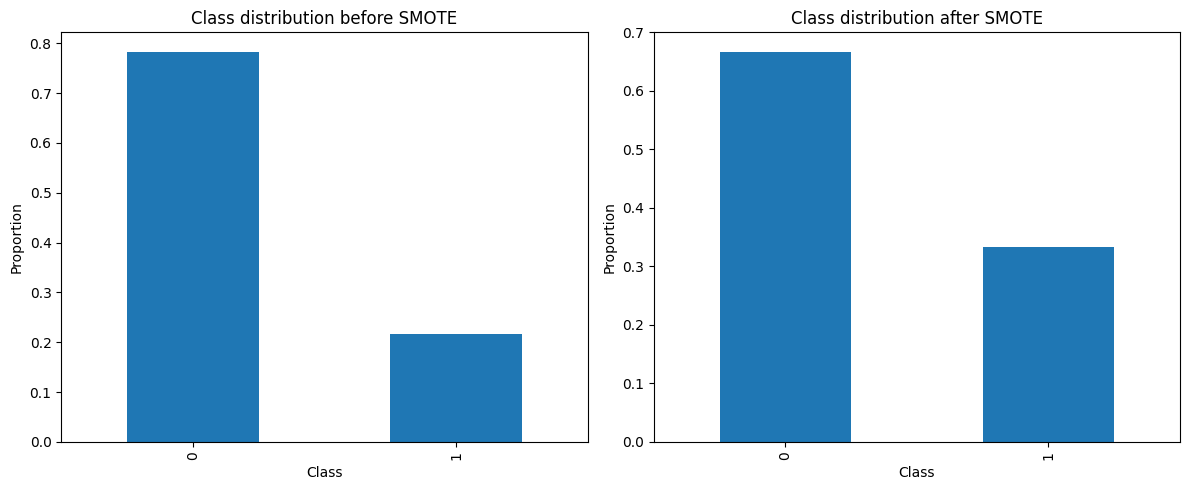

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Define preprocessing pipeline for numerical and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Numeric transformer pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Categorical transformer pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply SMOTE to handle class imbalance on preprocessed data
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)

# Initialize the RandomForestClassifier pipeline
random_forest_pipeline = Pipeline([
    ('rfclassifier', RandomForestClassifier(random_state=42))
])

# Define parameter grid for GridSearch
param_grid = {
    'rfclassifier__n_estimators': [100, 200, 300],
    'rfclassifier__min_samples_split': [2, 3, 5],
    'rfclassifier__max_depth': [4, 10, 30],
}

# Apply GridSearchCV with the specified parameter grid
grid_search = GridSearchCV(random_forest_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Evaluate the tuned model's performance
print("Best Score on tuned model:", grid_search.best_score_)
best_params = grid_search.best_params_
print("Best Parameters after model tuning:\n", best_params)

# Get the cross-validation results
cv_results_df = pd.DataFrame(grid_search.cv_results_)
print("\nResults for 5-fold cross-validation model training:\n", cv_results_df)

# Split the SMOTE-processed data into train and validation sets
X_train_final, X_valid, y_train_final, y_valid = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Use the best estimator from grid search for final model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_valid, y_pred))
print("\nClassification Report:\n", classification_report(y_valid, y_pred))

# Plot the class distribution before and after SMOTE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Before SMOTE
y_train.value_counts(normalize=True).plot(kind='bar', ax=axes[0], title='Class distribution before SMOTE')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Proportion')

# After SMOTE
pd.Series(y_train_smote).value_counts(normalize=True).plot(kind='bar', ax=axes[1], title='Class distribution after SMOTE')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()


In [ ]:
# Assuming X_test and y_test are your test datasets.

# Preprocess the test data using the same pipeline
X_test_preprocessed = preprocessor.transform(X_test)

# Predict on the test data using the best model from grid search
y_test_pred = best_model.predict(X_test_preprocessed)

# Evaluate the model's performance on the test data
print("Test Data Evaluation")
print("Accuracy on test data:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix on test data:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report on test data:\n", classification_report(y_test, y_test_pred))


Test Data Evaluation
Accuracy on test data: 0.7729621925328644

Confusion Matrix on test data:
 [[70870  2174]
 [19000  1218]]

Classification Report on test data:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87     73044
           1       0.36      0.06      0.10     20218

    accuracy                           0.77     93262
   macro avg       0.57      0.52      0.49     93262
weighted avg       0.70      0.77      0.70     93262



In [ ]:
def model_auc_roc(model, model_name, X_train, y_train, X_test, y_test):
    # 1. Predict on train and test
    train_predict_proba = model.predict_proba(X_train)[:, 1]
    test_predict_proba = model.predict_proba(X_test)[:, 1]

    # 2. Get FPR, TPR, and thresholds for train and test
    train_fpr, train_tpr, train_thr = roc_curve(y_train, train_predict_proba)
    test_fpr, test_tpr, test_thr = roc_curve(y_test, test_predict_proba)

    # 3. Calculate AUC for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)

    # 4. Print performance
    print(f"--- {model_name} ---")
    print(f"Train AUC Score        : {train_auc:.6f}")
    print(f"Test AUC Score         : {test_auc:.6f}\n")

    # 5. FPR from 1 - 5%
    model_stat = pd.DataFrame({
        'fpr': test_fpr,
        'tpr': test_tpr,
        'threshold': test_thr
    }).round(decimals=2)

    # Get maximum threshold for each FPR group
    m = model_stat.loc[model_stat.groupby('fpr')['threshold'].idxmax()]

    print("--- TEST score thresholds ---")
    print(m[(m['fpr'] > 0.0) & (m['fpr'] <= 0.05)].reset_index(drop=True))
    print("\n")

    # 6. Plot ROC Curve for the entire range
    plt.figure(figsize=(10, 5))
    plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f'Training (area = {train_auc:.2f})')
    plt.plot(test_fpr, test_tpr, color='darkblue', lw=2, label=f'Testing (area = {test_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axvline(x=0.05, color='r', linestyle='--', label='0.05 FPR Threshold')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # 7. Plot ROC Curve focusing on 0 to 0.2 FPR range
    plt.figure(figsize=(10, 5))
    plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f'Training (area = {train_auc:.2f})')
    plt.plot(test_fpr, test_tpr, color='darkblue', lw=2, label=f'Testing (area = {test_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axvline(x=0.05, color='r', linestyle='--', label='0.05 FPR Threshold')
    plt.xlim([0.0, 0.2])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve (FPR 0 to 0.2)')
    plt.legend(loc="lower right")
    plt.show()



model_auc_roc(clf, "Random Forest", X_train, y_train, X_test, y_test)


# Decision Trees

Training Accuracy: 0.9995494617894891
Test Accuracy: 0.6461474126653942
Training Data Evaluation
Accuracy on training data: 0.9995494617894891

Confusion Matrix on training data:
 [[109498      1]
 [    73  54676]]

Classification Report on training data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    109499
           1       1.00      1.00      1.00     54749

    accuracy                           1.00    164248
   macro avg       1.00      1.00      1.00    164248
weighted avg       1.00      1.00      1.00    164248

Test Data Evaluation
Accuracy on test data: 0.6461474126653942

Confusion Matrix on test data:
 [[54033 19011]
 [13990  6228]]

Classification Report on test data:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77     73044
           1       0.25      0.31      0.27     20218

    accuracy                           0.65     93262
   macro avg       0.52      0.52

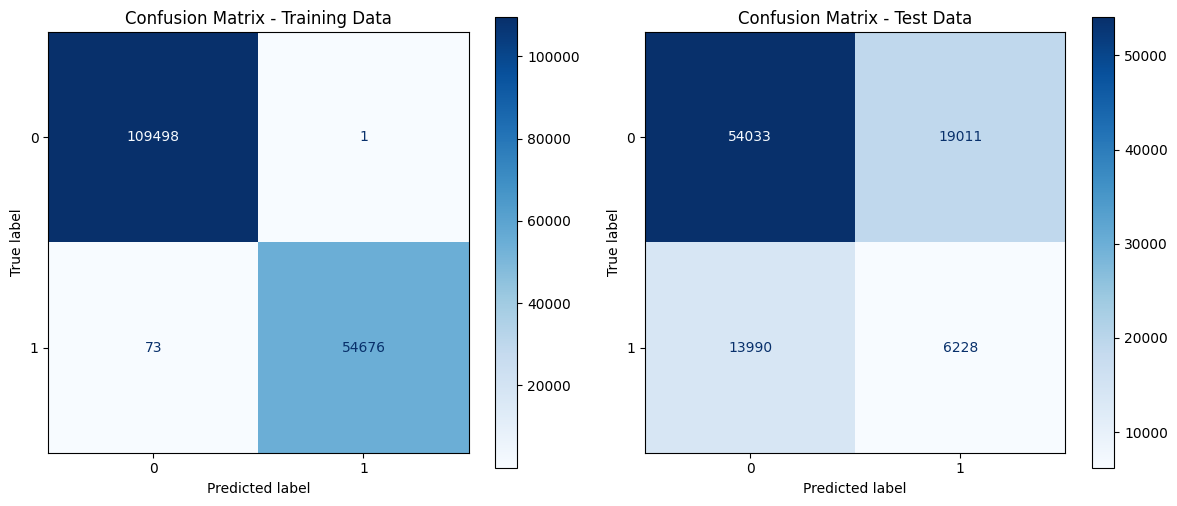

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the SMOTE-preprocessed data
decision_tree.fit(X_smote, y_smote)

# Predict on the training data (after SMOTE)
y_train_pred = decision_tree.predict(X_smote)

# Predict on the test data
X_test_preprocessed = preprocessor.transform(X_test)
y_test_pred = decision_tree.predict(X_test_preprocessed)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Calculate confusion matrices
conf_matrix_train = confusion_matrix(y_smote, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Evaluate the model's performance on the training data
print("Training Data Evaluation")
print("Accuracy on training data:", train_accuracy)
print("\nConfusion Matrix on training data:\n", conf_matrix_train)
print("\nClassification Report on training data:\n", classification_report(y_smote, y_train_pred))

# Evaluate the model's performance on the test data
print("Test Data Evaluation")
print("Accuracy on test data:", test_accuracy)
print("\nConfusion Matrix on test data:\n", conf_matrix_test)
print("\nClassification Report on test data:\n", classification_report(y_test, y_test_pred))

# Plot confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Confusion matrix for training data
ConfusionMatrixDisplay(conf_matrix_train, display_labels=decision_tree.classes_).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix - Training Data')

# Confusion matrix for test data
ConfusionMatrixDisplay(conf_matrix_test, display_labels=decision_tree.classes_).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()


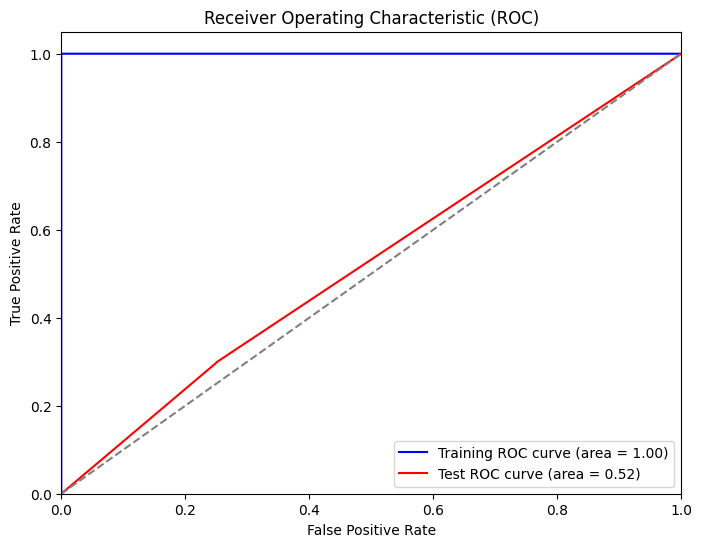

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the training and test sets
y_train_prob = decision_tree.predict_proba(X_smote)[:, 1]
y_test_prob = decision_tree.predict_proba(X_test_preprocessed)[:, 1]

# Calculate ROC AUC for training and test sets
roc_auc_train = roc_auc_score(y_smote, y_train_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

# Calculate ROC curves
fpr_train, tpr_train, _ = roc_curve(y_smote, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Plot ROC curves
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fpr_train, tpr_train, color='blue', label=f'Training ROC curve (area = {roc_auc_train:.2f})')
ax.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (area = {roc_auc_test:.2f})')
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC)')
ax.legend(loc='lower right')

plt.show()


# Model Tuning

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define preprocessing pipeline for numerical and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Numeric transformer pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Categorical transformer pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the pipeline including SMOTE and the Decision Tree Classifier
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('decisiontree', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'decisiontree__criterion': ['gini', 'entropy'],  # Criteria for splitting
    'decisiontree__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'decisiontree__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'decisiontree__min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'decisiontree__max_features': [None, 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy'
)

# Fit the model using GridSearchCV on the original training data (SMOTE is applied within the pipeline)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best Score on tuned model:", grid_search.best_score_)
print("Best Parameters after model tuning:\n", grid_search.best_params_)

# Use the best estimator for final model evaluation on training and test sets
best_decision_tree_model = grid_search.best_estimator_

# Evaluate on the test data
y_test_pred = best_decision_tree_model.predict(X_test)



Best Score on tuned model: 0.7743902319783351
Best Parameters after model tuning:
 {'decisiontree__criterion': 'entropy', 'decisiontree__max_depth': 10, 'decisiontree__max_features': 'sqrt', 'decisiontree__min_samples_leaf': 2, 'decisiontree__min_samples_split': 10}


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate the best estimator on the training data
y_train_pred = best_decision_tree_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the best estimator on the test data
y_test_pred = best_decision_tree_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print("Training Data Accuracy:", train_accuracy)
print("Test Data Accuracy:", test_accuracy)

# Confusion Matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix on Training Data:\n", conf_matrix_train)

# Confusion Matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix on Test Data:\n", conf_matrix_test)


Training Data Accuracy: 0.7733680267635032
Test Data Accuracy: 0.7677725118483413
Confusion Matrix on Training Data:
 [[105796   3703]
 [ 28001   2392]]
Confusion Matrix on Test Data:
 [[70185  2859]
 [18799  1419]]


In [45]:
from sklearn.metrics import classification_report

# Classification report for the training data
train_classification_report = classification_report(y_train, y_train_pred)
print("Classification Report on Training Data:\n", train_classification_report)

# Classification report for the test data
test_classification_report = classification_report(y_test, y_test_pred)
print("Classification Report on Test Data:\n", test_classification_report)


Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87    109499
           1       0.39      0.08      0.13     30393

    accuracy                           0.77    139892
   macro avg       0.59      0.52      0.50    139892
weighted avg       0.70      0.77      0.71    139892

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87     73044
           1       0.33      0.07      0.12     20218

    accuracy                           0.77     93262
   macro avg       0.56      0.52      0.49     93262
weighted avg       0.69      0.77      0.70     93262



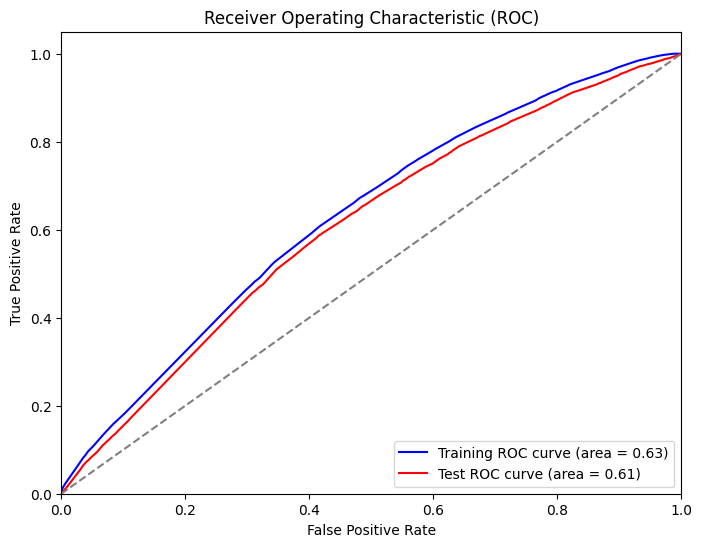

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (class 1) for both training and test sets
y_train_prob = best_decision_tree_model.predict_proba(X_train)[:, 1]
y_test_prob = best_decision_tree_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC for training and test sets
roc_auc_train = roc_auc_score(y_train, y_train_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

# Calculate ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Plot ROC curves
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fpr_train, tpr_train, color='blue', label=f'Training ROC curve (area = {roc_auc_train:.2f})')
ax.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (area = {roc_auc_test:.2f})')
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC)')
ax.legend(loc='lower right')

plt.show()


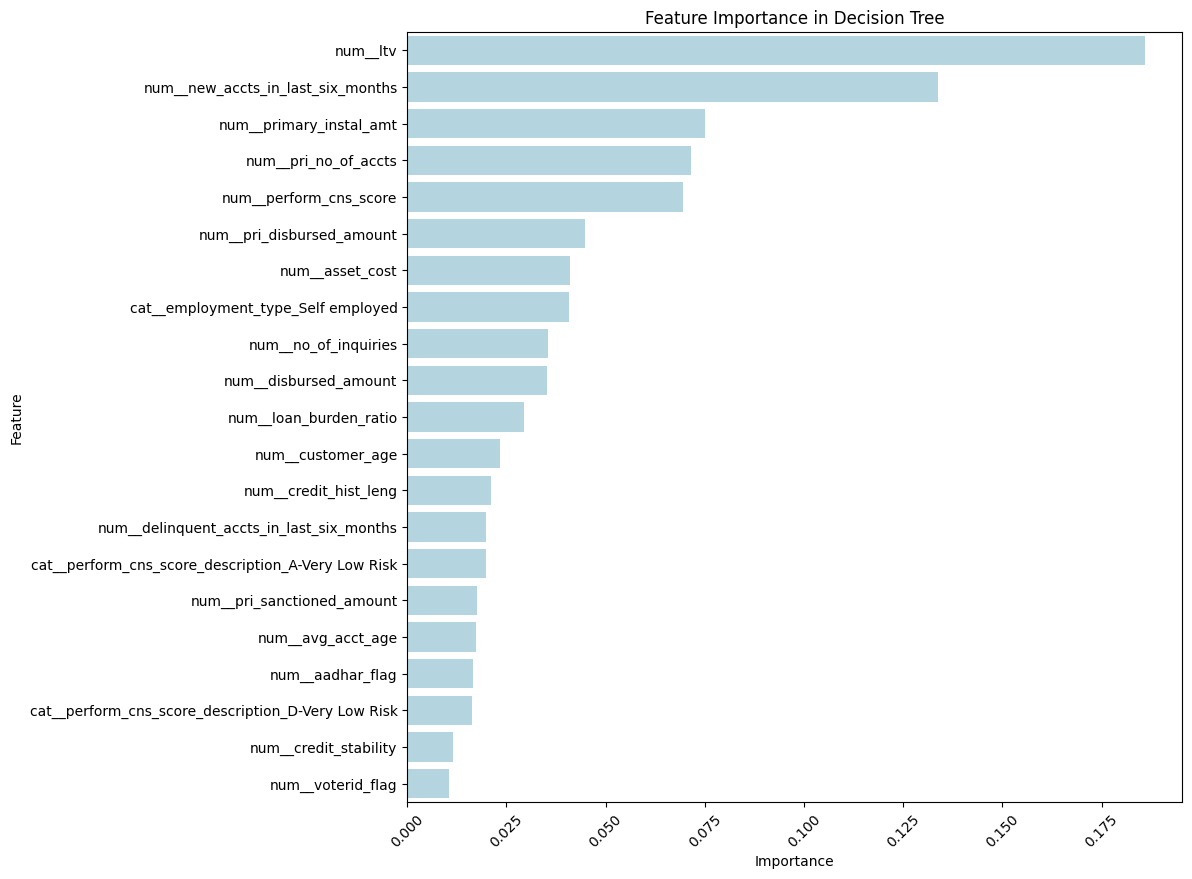

In [52]:
# Fit the preprocessor separately to the training data
preprocessor.fit(X_train)

# Now you can retrieve the feature names
feature_names = preprocessor.get_feature_names_out()

# Get feature importances from the trained Decision Tree model
importance = best_decision_tree_model.named_steps['decisiontree'].feature_importances_

# Initialize a dictionary to store feature importances
feature_imp = {}

# Map the feature importances to their respective feature names
for i, v in enumerate(importance):
    items = feature_names[i].split('_')
    if items[0].isdigit():
        # Handle categorical features: combining the feature name with its one-hot encoded category
        fname = categorical_features[int(items[0])] + "_" + items[1]
        feature_imp[fname] = v
    else:
        # Handle numerical features
        feature_imp[feature_names[i]] = v

# Convert the dictionary to a DataFrame for easier manipulation
feature_imp = pd.DataFrame.from_dict(feature_imp, orient='index', columns=['importance'])

# Prepare and filter the DataFrame, focusing on features with importance greater than 0.01
feature_imp = (feature_imp
               .reset_index()
               .rename(columns={'index': 'feature'})
               .sort_values('importance', ascending=False)
               .query('importance > 0.01'))

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x="importance", y="feature", data=feature_imp, color="lightblue")
plt.title('Feature Importance in Decision Tree')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.xticks(rotation=45)
plt.show()
